# Benchmarking scripts for ceLEry

## Intallation of the running environment

* Install the envrioment of ceLEry based on the instructions: https://github.com/QihuangZhang/CeLEry

In [2]:
import scanpy as sc
import torch
import CeLEry as cel
import os,csv,re
import pandas as pd
import numpy as np
import math
from skimage import io, color
from scipy.sparse import issparse
import random, torch
import warnings
warnings.filterwarnings("ignore")
import pickle
import json
import utils
import logging
from scipy.spatial.distance import cdist
import seaborn as sns
logging.getLogger().setLevel(logging.INFO)

## Utilized functions and variables

In [3]:
def preprocessQuery(query_adata,gene_list):
    
        
    '''
    
    reformat the query_adata by the gene_list
    
    '''
    gene_indices = [query_adata.var_names.get_loc(gene) for gene in gene_list]
    selected_adata = query_adata[:, gene_indices]

    
    # remove all zeros
    sum_per_cell = selected_adata.X.sum(axis=1)
    zero_cells = sum_per_cell == 0
    selected_adata = selected_adata[~zero_cells, :]
    if(issparse(selected_adata.X)):
        selected_adata.X = np.asarray(selected_adata.X.todense())

    
    return selected_adata
    

In [4]:
SAVE_ROOT = "./ceLEry"
if(not os.path.exists(SAVE_ROOT)):
    os.mkdir("ceLEry")


## 1. Spatial reconstruction of mouse gastrulation cells using single-cell resolution ST reference

### 1.1 Load data

In [8]:
DATA_ROOT = "../benchmarking_data"

embryo1_l1 = sc.read_h5ad(os.path.join(DATA_ROOT,"seqFISH_embryo1_l1.h5ad"))
embryo1_l2 = sc.read_h5ad(os.path.join(DATA_ROOT,"seqFISH_embryo1_l2.h5ad"))
embryo2_l2 = sc.read_h5ad(os.path.join(DATA_ROOT,"seqFISH_embryo2_l2.h5ad"))
embryo3_l2 = sc.read_h5ad(os.path.join(DATA_ROOT,"seqFISH_embryo3_l2.h5ad"))

print(embryo1_l1.shape,embryo1_l2.shape,embryo2_l2.shape,embryo3_l2.shape)

(10150, 351) (7656, 351) (6524, 351) (9408, 351)


### 1.2 Training the model with embryo1 L1


In [9]:
train_adata = embryo1_l1

In [10]:
model_train = cel.Fit_cord (data_train = train_adata, \
                            location_data=np.column_stack((train_adata.obs['x'],train_adata.obs['y'])),\
                            path = "./ceLEry", filename = "celery_seqfish_E1L1")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 164.17it/s]


Epoch:1, Loss:47.4365


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 163.56it/s]


Epoch:2, Loss:21.8124


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 195.17it/s]


Epoch:3, Loss:17.9070


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:17<00:00, 147.05it/s]


Epoch:4, Loss:15.4556


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:14<00:00, 177.54it/s]


Epoch:5, Loss:13.6334


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 203.97it/s]


Epoch:6, Loss:12.1912


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 189.49it/s]


Epoch:7, Loss:10.9588


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 194.05it/s]


Epoch:8, Loss:10.0171


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 195.71it/s]


Epoch:9, Loss:9.1152


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:14<00:00, 174.97it/s]


Epoch:10, Loss:8.3831


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 256.44it/s]


Epoch:11, Loss:7.7249


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.76it/s]


Epoch:12, Loss:7.2122


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 242.76it/s]


Epoch:13, Loss:6.7217


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:14<00:00, 170.40it/s]


Epoch:14, Loss:6.3138


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:14<00:00, 176.68it/s]


Epoch:15, Loss:5.8999


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 201.95it/s]


Epoch:16, Loss:5.5528


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 245.87it/s]


Epoch:17, Loss:5.2535


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 241.75it/s]


Epoch:18, Loss:4.9872


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 253.48it/s]


Epoch:19, Loss:4.6864


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 167.92it/s]


Epoch:20, Loss:4.4871


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:11<00:00, 229.47it/s]


Epoch:21, Loss:4.2711


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:16<00:00, 158.15it/s]


Epoch:22, Loss:4.0750


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:11<00:00, 214.04it/s]


Epoch:23, Loss:3.9209


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:14<00:00, 178.00it/s]


Epoch:24, Loss:3.7659


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 244.55it/s]


Epoch:25, Loss:3.6411


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 253.77it/s]


Epoch:26, Loss:3.4787


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.39it/s]


Epoch:27, Loss:3.3628


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 252.14it/s]


Epoch:28, Loss:3.2598


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.29it/s]


Epoch:29, Loss:3.1709


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 259.21it/s]


Epoch:30, Loss:3.0588


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.78it/s]


Epoch:31, Loss:2.9968


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 254.44it/s]


Epoch:32, Loss:2.9113


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.84it/s]


Epoch:33, Loss:2.8394


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.98it/s]


Epoch:34, Loss:2.7615


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 253.95it/s]


Epoch:35, Loss:2.6789


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 257.23it/s]


Epoch:36, Loss:2.6404


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 240.70it/s]


Epoch:37, Loss:2.5692


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 246.01it/s]


Epoch:38, Loss:2.5323


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.67it/s]


Epoch:39, Loss:2.4851


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:24<00:00, 101.90it/s]


Epoch:40, Loss:2.4215


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:45<00:00, 56.27it/s]


Epoch:41, Loss:2.3616


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:17<00:00, 142.20it/s]


Epoch:42, Loss:2.3541


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:17<00:00, 144.12it/s]


Epoch:43, Loss:2.3063


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 186.88it/s]


Epoch:44, Loss:2.2557


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:17<00:00, 144.89it/s]


Epoch:45, Loss:2.2205


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:17<00:00, 146.14it/s]


Epoch:46, Loss:2.1732


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 183.79it/s]


Epoch:47, Loss:2.1680


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:18<00:00, 133.73it/s]


Epoch:48, Loss:2.1372


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:17<00:00, 142.29it/s]


Epoch:49, Loss:2.0809


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:11<00:00, 221.02it/s]


Epoch:50, Loss:2.0722


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 161.35it/s]


Epoch:51, Loss:2.0378


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 159.01it/s]


Epoch:52, Loss:1.9937


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.59it/s]


Epoch:53, Loss:1.9885


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 245.44it/s]


Epoch:54, Loss:1.9571


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.33it/s]


Epoch:55, Loss:1.9318


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 255.07it/s]


Epoch:56, Loss:1.9100


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.48it/s]


Epoch:57, Loss:1.9080


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 260.85it/s]


Epoch:58, Loss:1.8582


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.70it/s]


Epoch:59, Loss:1.8512


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 254.64it/s]


Epoch:60, Loss:1.8372


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.70it/s]


Epoch:61, Loss:1.8229


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 259.18it/s]


Epoch:62, Loss:1.7978


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 263.40it/s]


Epoch:63, Loss:1.7832


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 253.99it/s]


Epoch:64, Loss:1.7500


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.19it/s]


Epoch:65, Loss:1.7580


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.11it/s]


Epoch:66, Loss:1.7439


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 256.49it/s]


Epoch:67, Loss:1.7118


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.10it/s]


Epoch:68, Loss:1.7054


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 250.42it/s]


Epoch:69, Loss:1.6954


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.30it/s]


Epoch:70, Loss:1.6705


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 253.52it/s]


Epoch:71, Loss:1.6681


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.10it/s]


Epoch:72, Loss:1.6526


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 245.49it/s]


Epoch:73, Loss:1.6443


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 255.72it/s]


Epoch:74, Loss:1.6209


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:25<00:00, 99.84it/s]


Epoch:75, Loss:1.6224


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:27<00:00, 92.29it/s]


Epoch:76, Loss:1.5917


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 164.44it/s]


Epoch:77, Loss:1.5975


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:16<00:00, 153.48it/s]


Epoch:78, Loss:1.5646


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:16<00:00, 151.06it/s]


Epoch:79, Loss:1.5726


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 158.84it/s]


Epoch:80, Loss:1.5573


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 201.96it/s]


Epoch:81, Loss:1.5578


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 205.95it/s]


Epoch:82, Loss:1.5510


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 165.00it/s]


Epoch:83, Loss:1.5283


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:16<00:00, 150.27it/s]


Epoch:84, Loss:1.5290


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:16<00:00, 153.67it/s]


Epoch:85, Loss:1.5157


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:16<00:00, 151.27it/s]


Epoch:86, Loss:1.5060


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 195.27it/s]


Epoch:87, Loss:1.4962


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:11<00:00, 224.04it/s]


Epoch:88, Loss:1.5025


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:16<00:00, 153.45it/s]


Epoch:89, Loss:1.4745


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:17<00:00, 143.15it/s]


Epoch:90, Loss:1.4741


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:18<00:00, 139.88it/s]


Epoch:91, Loss:1.4725


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:16<00:00, 150.41it/s]


Epoch:92, Loss:1.4680


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 192.32it/s]


Epoch:93, Loss:1.4443


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 194.51it/s]


Epoch:94, Loss:1.4389


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:17<00:00, 147.31it/s]


Epoch:95, Loss:1.4408


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:18<00:00, 140.33it/s]


Epoch:96, Loss:1.4157


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:17<00:00, 142.14it/s]


Epoch:97, Loss:1.4271


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 162.26it/s]


Epoch:98, Loss:1.4218


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 186.46it/s]


Epoch:99, Loss:1.4161


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 181.94it/s]


Epoch:100, Loss:1.3995


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:17<00:00, 144.65it/s]


Epoch:101, Loss:1.3849


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:17<00:00, 141.02it/s]


Epoch:102, Loss:1.3811


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:17<00:00, 144.67it/s]


Epoch:103, Loss:1.3865


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:14<00:00, 171.37it/s]


Epoch:104, Loss:1.3717


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 192.00it/s]


Epoch:105, Loss:1.3695


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:11<00:00, 223.23it/s]


Epoch:106, Loss:1.3746


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 187.10it/s]


Epoch:107, Loss:1.3535


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 169.13it/s]


Epoch:108, Loss:1.3528


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.80it/s]


Epoch:109, Loss:1.3477


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:11<00:00, 221.82it/s]


Epoch:110, Loss:1.3416


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 187.13it/s]


Epoch:111, Loss:1.3363


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 168.86it/s]


Epoch:112, Loss:1.3447


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 162.37it/s]


Epoch:113, Loss:1.3167


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 191.49it/s]


Epoch:114, Loss:1.3199
New learning rate:5e-05


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 164.11it/s]


Epoch:115, Loss:1.1797


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 164.13it/s]


Epoch:116, Loss:1.1242


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:11<00:00, 228.16it/s]


Epoch:117, Loss:1.1150


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 246.41it/s]


Epoch:118, Loss:1.1129


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 236.90it/s]


Epoch:119, Loss:1.1067


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:11<00:00, 225.62it/s]


Epoch:120, Loss:1.0956


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 201.05it/s]


Epoch:121, Loss:1.0917


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 211.50it/s]


Epoch:122, Loss:1.0905


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 235.52it/s]


Epoch:123, Loss:1.0921


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 200.93it/s]


Epoch:124, Loss:1.0766


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 166.38it/s]


Epoch:125, Loss:1.0812


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 160.86it/s]


Epoch:126, Loss:1.0790


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:14<00:00, 180.92it/s]


Epoch:127, Loss:1.0739


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 165.92it/s]


Epoch:128, Loss:1.0724


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:14<00:00, 180.65it/s]


Epoch:129, Loss:1.0719


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.98it/s]


Epoch:130, Loss:1.0627


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 244.31it/s]


Epoch:131, Loss:1.0674


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 243.10it/s]


Epoch:132, Loss:1.0641


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 201.86it/s]


Epoch:133, Loss:1.0563


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:11<00:00, 222.32it/s]


Epoch:134, Loss:1.0513


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 231.15it/s]


Epoch:135, Loss:1.0528


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:11<00:00, 212.13it/s]


Epoch:136, Loss:1.0528


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:11<00:00, 226.75it/s]


Epoch:137, Loss:1.0472


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 204.79it/s]


Epoch:138, Loss:1.0466


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 183.17it/s]


Epoch:139, Loss:1.0462


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 163.81it/s]


Epoch:140, Loss:1.0392


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 162.08it/s]


Epoch:141, Loss:1.0395


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:14<00:00, 181.01it/s]


Epoch:142, Loss:1.0385


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 167.76it/s]


Epoch:143, Loss:1.0346


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 161.96it/s]


Epoch:144, Loss:1.0333


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 164.64it/s]


Epoch:145, Loss:1.0301


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 198.65it/s]


Epoch:146, Loss:1.0295


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 237.84it/s]


Epoch:147, Loss:1.0289


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.28it/s]


Epoch:148, Loss:1.0305


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 240.87it/s]


Epoch:149, Loss:1.0306


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:14<00:00, 170.84it/s]


Epoch:150, Loss:1.0169


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:21<00:00, 115.91it/s]


Epoch:151, Loss:1.0207


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:16<00:00, 151.80it/s]


Epoch:152, Loss:1.0220


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 190.60it/s]


Epoch:153, Loss:1.0162


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:14<00:00, 178.59it/s]


Epoch:154, Loss:1.0132


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 161.31it/s]


Epoch:155, Loss:1.0106


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 181.88it/s]


Epoch:156, Loss:1.0183


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:14<00:00, 170.12it/s]


Epoch:157, Loss:1.0096


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:17<00:00, 147.44it/s]


Epoch:158, Loss:1.0070


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 193.90it/s]


Epoch:159, Loss:1.0045


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 204.22it/s]


Epoch:160, Loss:1.0075


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 202.88it/s]


Epoch:161, Loss:0.9990


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 191.18it/s]


Epoch:162, Loss:1.0027
New learning rate:2.5e-05


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 188.91it/s]


Epoch:163, Loss:0.9356


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 208.52it/s]


Epoch:164, Loss:0.9161


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 240.13it/s]


Epoch:165, Loss:0.9145


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 250.13it/s]


Epoch:166, Loss:0.9113


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:11<00:00, 222.80it/s]


Epoch:167, Loss:0.9101


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 189.21it/s]


Epoch:168, Loss:0.9080


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:11<00:00, 218.61it/s]


Epoch:169, Loss:0.9077


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:11<00:00, 221.84it/s]


Epoch:171, Loss:0.9053


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 246.68it/s]


Epoch:172, Loss:0.9034


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 242.71it/s]


Epoch:173, Loss:0.9007


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 191.17it/s]


Epoch:174, Loss:0.9021


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 200.17it/s]


Epoch:175, Loss:0.9029


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 188.08it/s]


Epoch:176, Loss:0.8983


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 209.61it/s]


Epoch:177, Loss:0.8971


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:14<00:00, 171.04it/s]


Epoch:178, Loss:0.8973


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:11<00:00, 215.72it/s]


Epoch:179, Loss:0.8977


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.79it/s]


Epoch:180, Loss:0.8943


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.18it/s]


Epoch:181, Loss:0.8950


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 243.53it/s]


Epoch:182, Loss:0.8929


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:21<00:00, 120.71it/s]


Epoch:183, Loss:0.8938


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:44<00:00, 57.22it/s]


Epoch:184, Loss:0.8913


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:25<00:00, 101.18it/s]


Epoch:185, Loss:0.8910


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:18<00:00, 139.54it/s]


Epoch:186, Loss:0.8907


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:13<00:00, 192.09it/s]


Epoch:187, Loss:0.8906


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:15<00:00, 168.35it/s]


Epoch:188, Loss:0.8868


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:17<00:00, 142.13it/s]


Epoch:189, Loss:0.8876


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 195.34it/s]


Epoch:190, Loss:0.8880


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:12<00:00, 210.17it/s]


Epoch:191, Loss:0.8845


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:17<00:00, 142.76it/s]


Epoch:192, Loss:0.8862


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:14<00:00, 171.01it/s]


Epoch:193, Loss:0.8841


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:11<00:00, 222.96it/s]


Epoch:194, Loss:0.8872


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:17<00:00, 148.05it/s]


Epoch:195, Loss:0.8825


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:14<00:00, 176.62it/s]


Epoch:196, Loss:0.8837


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.15it/s]


Epoch:197, Loss:0.8815


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 250.21it/s]


Epoch:198, Loss:0.8842


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 245.43it/s]


Epoch:199, Loss:0.8813


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.49it/s]


Epoch:200, Loss:0.8808


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 254.09it/s]


Epoch:201, Loss:0.8798


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 246.16it/s]


Epoch:202, Loss:0.8767


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 241.34it/s]


Epoch:203, Loss:0.8783


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.55it/s]


Epoch:204, Loss:0.8771


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 242.75it/s]


Epoch:205, Loss:0.8766


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.20it/s]


Epoch:206, Loss:0.8776
New learning rate:1.25e-05


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.24it/s]


Epoch:207, Loss:0.8409


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 253.79it/s]


Epoch:208, Loss:0.8380


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 246.67it/s]


Epoch:209, Loss:0.8379


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 254.05it/s]


Epoch:210, Loss:0.8363


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 253.01it/s]


Epoch:211, Loss:0.8366


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 253.10it/s]


Epoch:212, Loss:0.8365


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 246.98it/s]


Epoch:213, Loss:0.8348


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 245.01it/s]


Epoch:214, Loss:0.8348


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 252.73it/s]


Epoch:215, Loss:0.8348


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.57it/s]


Epoch:216, Loss:0.8342


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 244.99it/s]


Epoch:217, Loss:0.8343


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.93it/s]


Epoch:218, Loss:0.8325


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 257.67it/s]


Epoch:219, Loss:0.8332


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 250.48it/s]


Epoch:220, Loss:0.8324


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.45it/s]


Epoch:221, Loss:0.8332


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.20it/s]


Epoch:222, Loss:0.8306


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.65it/s]


Epoch:223, Loss:0.8318


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.99it/s]


Epoch:224, Loss:0.8321


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 258.19it/s]


Epoch:225, Loss:0.8304


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 242.65it/s]


Epoch:226, Loss:0.8312


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 252.95it/s]


Epoch:227, Loss:0.8301


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.83it/s]


Epoch:228, Loss:0.8292


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 250.71it/s]


Epoch:229, Loss:0.8298


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 254.21it/s]


Epoch:230, Loss:0.8276


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.07it/s]


Epoch:231, Loss:0.8288


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 252.40it/s]


Epoch:232, Loss:0.8288


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 254.56it/s]


Epoch:233, Loss:0.8280


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.42it/s]


Epoch:234, Loss:0.8270


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 256.81it/s]


Epoch:235, Loss:0.8274


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 253.64it/s]


Epoch:236, Loss:0.8264


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.50it/s]


Epoch:237, Loss:0.8270
New learning rate:6.25e-06


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 244.40it/s]


Epoch:238, Loss:0.8091


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 255.40it/s]


Epoch:239, Loss:0.8078


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.23it/s]


Epoch:240, Loss:0.8082


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 246.28it/s]


Epoch:241, Loss:0.8070


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 250.40it/s]


Epoch:242, Loss:0.8075


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.52it/s]


Epoch:243, Loss:0.8071


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 245.65it/s]


Epoch:244, Loss:0.8068


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 252.27it/s]


Epoch:245, Loss:0.8060


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 250.83it/s]


Epoch:246, Loss:0.8063


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.88it/s]


Epoch:247, Loss:0.8061


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 250.55it/s]


Epoch:248, Loss:0.8057


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.91it/s]


Epoch:249, Loss:0.8058


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.34it/s]


Epoch:250, Loss:0.8059


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.85it/s]


Epoch:251, Loss:0.8054


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 245.28it/s]


Epoch:252, Loss:0.8050


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 253.47it/s]


Epoch:253, Loss:0.8057


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 246.16it/s]


Epoch:254, Loss:0.8048


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 245.13it/s]


Epoch:255, Loss:0.8051


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.07it/s]


Epoch:256, Loss:0.8045


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 244.73it/s]


Epoch:257, Loss:0.8044


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 243.57it/s]


Epoch:258, Loss:0.8049


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 252.55it/s]


Epoch:259, Loss:0.8042


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.60it/s]


Epoch:260, Loss:0.8046


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.15it/s]


Epoch:261, Loss:0.8043


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 254.65it/s]


Epoch:262, Loss:0.8037


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 243.41it/s]


Epoch:263, Loss:0.8038


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 246.21it/s]


Epoch:264, Loss:0.8035


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.00it/s]


Epoch:265, Loss:0.8033


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 252.36it/s]


Epoch:266, Loss:0.8024


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 245.27it/s]


Epoch:267, Loss:0.8024


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 244.29it/s]


Epoch:268, Loss:0.8027
New learning rate:3.125e-06


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 242.88it/s]


Epoch:269, Loss:0.7939


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.33it/s]


Epoch:270, Loss:0.7936


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.82it/s]


Epoch:271, Loss:0.7933


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 244.83it/s]


Epoch:272, Loss:0.7929


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 256.46it/s]


Epoch:273, Loss:0.7933


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 245.32it/s]


Epoch:274, Loss:0.7933


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 250.22it/s]


Epoch:275, Loss:0.7930


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 242.03it/s]


Epoch:276, Loss:0.7934


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.26it/s]


Epoch:277, Loss:0.7927


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.84it/s]


Epoch:278, Loss:0.7930


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 256.69it/s]


Epoch:279, Loss:0.7923


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 245.53it/s]


Epoch:280, Loss:0.7921


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.44it/s]


Epoch:281, Loss:0.7923


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 255.04it/s]


Epoch:282, Loss:0.7921


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 245.71it/s]


Epoch:283, Loss:0.7923


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 242.70it/s]


Epoch:284, Loss:0.7914


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.59it/s]


Epoch:285, Loss:0.7922


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 243.97it/s]


Epoch:286, Loss:0.7919


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.49it/s]


Epoch:287, Loss:0.7919


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 253.69it/s]


Epoch:288, Loss:0.7916


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 253.24it/s]


Epoch:289, Loss:0.7916


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.33it/s]


Epoch:290, Loss:0.7917


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.59it/s]


Epoch:291, Loss:0.7914


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.25it/s]


Epoch:292, Loss:0.7909


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.22it/s]


Epoch:293, Loss:0.7917


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 254.88it/s]


Epoch:294, Loss:0.7913
New learning rate:1.5625e-06


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 245.66it/s]


Epoch:295, Loss:0.7868


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 252.97it/s]


Epoch:296, Loss:0.7867


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 246.34it/s]


Epoch:297, Loss:0.7871


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.95it/s]


Epoch:298, Loss:0.7864


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 250.66it/s]


Epoch:299, Loss:0.7865


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 254.84it/s]


Epoch:300, Loss:0.7861


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 254.80it/s]


Epoch:301, Loss:0.7861


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 243.85it/s]


Epoch:302, Loss:0.7863


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 246.10it/s]


Epoch:303, Loss:0.7861


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.47it/s]


Epoch:304, Loss:0.7858


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 263.63it/s]


Epoch:305, Loss:0.7857


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 252.23it/s]


Epoch:306, Loss:0.7861


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.81it/s]


Epoch:307, Loss:0.7860


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.28it/s]


Epoch:308, Loss:0.7860


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 250.60it/s]


Epoch:309, Loss:0.7857


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 253.54it/s]


Epoch:310, Loss:0.7861


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 256.77it/s]


Epoch:311, Loss:0.7858


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 250.81it/s]


Epoch:312, Loss:0.7857


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 253.96it/s]


Epoch:313, Loss:0.7857


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.98it/s]


Epoch:314, Loss:0.7857


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 255.31it/s]


Epoch:315, Loss:0.7855


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 260.25it/s]


Epoch:316, Loss:0.7855


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 261.92it/s]


Epoch:317, Loss:0.7856


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 252.38it/s]


Epoch:318, Loss:0.7857
New learning rate:7.8125e-07


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.86it/s]


Epoch:319, Loss:0.7830


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 257.40it/s]


Epoch:320, Loss:0.7830


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.45it/s]


Epoch:321, Loss:0.7830


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 252.77it/s]


Epoch:322, Loss:0.7836


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 257.48it/s]


Epoch:323, Loss:0.7832


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.91it/s]


Epoch:324, Loss:0.7829


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 252.08it/s]


Epoch:325, Loss:0.7829


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.47it/s]


Epoch:326, Loss:0.7830


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 259.92it/s]


Epoch:327, Loss:0.7830


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 258.32it/s]


Epoch:328, Loss:0.7828


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 258.02it/s]


Epoch:329, Loss:0.7828


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.63it/s]


Epoch:330, Loss:0.7832


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.90it/s]


Epoch:331, Loss:0.7826


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 242.62it/s]


Epoch:332, Loss:0.7828


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.71it/s]


Epoch:333, Loss:0.7829


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 256.04it/s]


Epoch:334, Loss:0.7827


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 245.39it/s]


Epoch:335, Loss:0.7826


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 240.32it/s]


Epoch:336, Loss:0.7829


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.54it/s]


Epoch:337, Loss:0.7826


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.80it/s]


Epoch:338, Loss:0.7827


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.03it/s]


Epoch:339, Loss:0.7826
New learning rate:3.90625e-07


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 255.71it/s]


Epoch:340, Loss:0.7815


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 256.72it/s]


Epoch:341, Loss:0.7813


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 250.31it/s]


Epoch:342, Loss:0.7815


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 253.96it/s]


Epoch:343, Loss:0.7813


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 260.46it/s]


Epoch:344, Loss:0.7813


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 257.11it/s]


Epoch:345, Loss:0.7812


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.15it/s]


Epoch:346, Loss:0.7813


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 254.30it/s]


Epoch:347, Loss:0.7814


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 246.01it/s]


Epoch:348, Loss:0.7813


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.09it/s]


Epoch:349, Loss:0.7812


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 246.93it/s]


Epoch:350, Loss:0.7812


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 258.22it/s]


Epoch:351, Loss:0.7813


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.78it/s]


Epoch:352, Loss:0.7813


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 255.94it/s]


Epoch:353, Loss:0.7812


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 259.07it/s]


Epoch:354, Loss:0.7812


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.92it/s]


Epoch:355, Loss:0.7813


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 255.18it/s]


Epoch:356, Loss:0.7813


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 256.33it/s]


Epoch:357, Loss:0.7811


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 250.92it/s]


Epoch:358, Loss:0.7813


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 242.92it/s]


Epoch:359, Loss:0.7815


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.11it/s]


Epoch:360, Loss:0.7811


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 256.82it/s]


Epoch:361, Loss:0.7814


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.81it/s]


Epoch:362, Loss:0.7810


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.17it/s]


Epoch:363, Loss:0.7812
New learning rate:1.953125e-07


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.96it/s]


Epoch:364, Loss:0.7807


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 245.12it/s]


Epoch:365, Loss:0.7804


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 254.66it/s]


Epoch:366, Loss:0.7805


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 246.30it/s]


Epoch:367, Loss:0.7805


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 248.36it/s]


Epoch:368, Loss:0.7805


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 247.46it/s]


Epoch:369, Loss:0.7805


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 254.48it/s]


Epoch:370, Loss:0.7804


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 255.69it/s]


Epoch:371, Loss:0.7805


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 255.66it/s]


Epoch:372, Loss:0.7805


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 252.42it/s]


Epoch:373, Loss:0.7804


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 249.28it/s]


Epoch:374, Loss:0.7804


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.69it/s]


Epoch:375, Loss:0.7803


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 250.88it/s]


Epoch:376, Loss:0.7807


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 261.41it/s]


Epoch:377, Loss:0.7803


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 252.18it/s]


Epoch:378, Loss:0.7803


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:09<00:00, 254.05it/s]


Epoch:379, Loss:0.7804


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 250.00it/s]


Epoch:380, Loss:0.7805


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 250.64it/s]


Epoch:381, Loss:0.7803


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 250.13it/s]


Epoch:382, Loss:0.7803


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 251.38it/s]


Epoch:383, Loss:0.7804


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2538/2538 [00:10<00:00, 243.22it/s]

Epoch:384, Loss:0.7804
New learning rate:9.765625e-08
Folder already exists


### 1.3 Evaluation on the embryo1 L2, embryo2 L2, embryo3 L3

In [24]:
test_adata_list = {"embryo1_l2":embryo1_l2,"embryo2_l2":embryo2_l2,"embryo3_l2":embryo3_l2}

neighbor_hit_res = {'Dataset':[],'K nearest neighbor':[],'Average hit number':[]}
JSD_spearman_res = {'Dataset':[],'Average JSD':[],"Average spearman's rank correlation coefficient":[]}
res_summary_all   = {"Dataset":[],"Cell type":[],"Average JSD":[],"Average spearman":[]}

for test_name in test_adata_list:
    cur_test_adata = test_adata_list[test_name]
    cur_truth_coor = np.column_stack((cur_test_adata.obs['x'].values,cur_test_adata.obs['y'].values))
    
    logging.info("Model inference for "+test_name)
    predicted_coor = cel.Predict_cord (data_test = cur_test_adata,location_data=cur_truth_coor,path = SAVE_ROOT, filename = "celery_seqfish_E1L1")
    logging.info("Inference DONE")
        
    predicted_distances =  cdist(predicted_coor, predicted_coor)
    predicted_sorted_ind = np.argsort(predicted_distances)
    
    truth_distances =  cdist(cur_truth_coor, cur_truth_coor)
    truth_sorted_ind = np.argsort(truth_distances)
    
    # neighbor hit
    cur_neighbor_res,cur_average_neighbor_res = utils.calNeiborHit(truth_sorted_ind,predicted_sorted_ind)
    neighbor_hit_res['Dataset'].extend([test_name]*10)
    neighbor_hit_res['K nearest neighbor'].extend(cur_average_neighbor_res['K nearest neighbor'])
    neighbor_hit_res['Average hit number'].extend(cur_average_neighbor_res['Average hit number'])
    
    # JSD
    cur_truth_cell_types = cur_test_adata.obs['cell_type'].values
    cur_jsd_list = utils.calJSD(truth_sorted_ind,predicted_sorted_ind,cur_truth_cell_types,neighbor_num=20)
    
    # Spearman rank correlation
    spearman_corr_list,spearman_p_list = utils.calSpearmanRank(predicted_distances,truth_distances)
    
    JSD_spearman_res['Dataset'].append(test_name)
    JSD_spearman_res['Average JSD'].append(np.mean(cur_jsd_list))
    JSD_spearman_res["Average spearman's rank correlation coefficient"].append(np.mean(spearman_corr_list))
    
    res_summary_all['Dataset'].extend([test_name]*len(cur_truth_cell_types))
    res_summary_all['Cell type'].extend(cur_truth_cell_types)
    res_summary_all['Average JSD'].extend(cur_jsd_list)
    res_summary_all['Average spearman'].extend(spearman_corr_list)


neighbor_hit_res = pd.DataFrame(neighbor_hit_res)
JSD_spearman_res = pd.DataFrame(JSD_spearman_res)
res_summary_all = pd.DataFrame(res_summary_all)

INFO:root:Model inference for embryo1_l2
INFO:root:Inference DONE
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 7656/7656 [00:16<00:00, 474.97it/s]
INFO:root:Model inference for embryo2_l2
INFO:root:Inference DONE
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 6524/6524 [00:12<00:00, 519.23it/s]
INFO:root:Model inference for embryo3_l2
INFO:root:Inference DONE
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 9408/9408 [00:22<00:00, 412.05it/s]


In [25]:
res_summary_all.to_csv("results/ceLEry_mouse_single_cell_ref.csv")

### 1.3 Benchmarking results

#### 1.3.1 Nearest neighbor hit


<Axes: xlabel='K nearest neighbor', ylabel='Average hit number'>

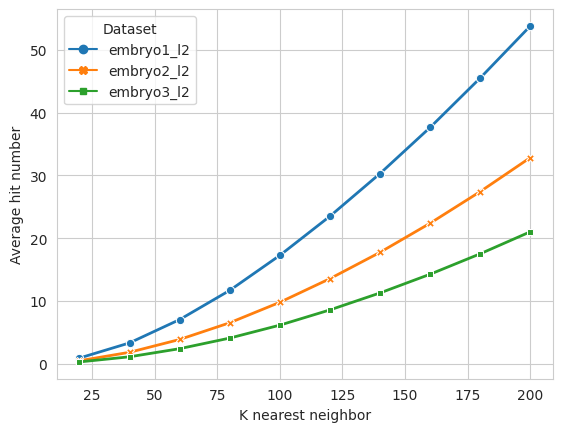

In [28]:
sns.set_style('whitegrid')
sns.lineplot(data=neighbor_hit_res,x="K nearest neighbor",y="Average hit number",hue="Dataset",markers=True,style='Dataset',\
             dashes=False,linewidth=2)

#### 1.3.2 Average JSD and  spearman's rank correlation coefficient


In [29]:
display(JSD_spearman_res)

,Dataset,Average JSD,Average spearman's rank correlation coefficient
0,embryo1_l2,0.435424,0.769359
1,embryo2_l2,0.440162,0.590688
2,embryo3_l2,0.562419,0.486693


## 2. Spatial location inference across platforms: mouse gastrulation datasets

### 2.1 Load data

In [23]:
# Please modify the data path as needed
DATA_ROOT = "../benchmarking_data"
stereoseq_E2S1 = sc.read_h5ad(os.path.join(DATA_ROOT,"stereoseq_E2S1.h5ad"))
embryo1_l2 = sc.read_h5ad(os.path.join(DATA_ROOT,"seqFISH_embryo1_l2.h5ad"))
embryo2_l2 = sc.read_h5ad(os.path.join(DATA_ROOT,"seqFISH_embryo2_l2.h5ad"))
embryo3_l2 = sc.read_h5ad(os.path.join(DATA_ROOT,"seqFISH_embryo3_l2.h5ad"))
train_adata = stereoseq_E2S1

### 2.2 Data preprocessing

In [24]:
test_adata_list = {"embryo1_l2":embryo1_l2,"embryo2_l2":embryo2_l2,"embryo3_l2":embryo3_l2}

for cur_test_name in test_adata_list:
    cur_test_data = test_adata_list[cur_test_name]
    cur_processed_data = preprocessQuery(cur_test_data,train_adata.var_names)
    test_adata_list[cur_test_name] = cur_processed_data

### 2.3 Training the model with embryo1 L1

In [6]:
model_train = cel.Fit_cord (data_train = train_adata, \
                            location_data=np.column_stack((train_adata.obs['x'],train_adata.obs['y'])),\
                            path = "./ceLEry", filename = "celery_stereoseq")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.52it/s]


Epoch:1, Loss:68.5145


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.77it/s]


Epoch:2, Loss:47.1793


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.73it/s]


Epoch:3, Loss:41.6380


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.51it/s]


Epoch:4, Loss:38.8255


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.13it/s]


Epoch:5, Loss:37.1973


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.95it/s]


Epoch:6, Loss:36.0617


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:04<00:00, 264.51it/s]


Epoch:7, Loss:35.1093


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.34it/s]


Epoch:8, Loss:34.2872


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.31it/s]


Epoch:9, Loss:33.4526


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.49it/s]


Epoch:10, Loss:32.5766


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 242.66it/s]


Epoch:11, Loss:31.7516


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.30it/s]


Epoch:12, Loss:30.8068


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.76it/s]


Epoch:13, Loss:30.0978


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 242.42it/s]


Epoch:14, Loss:29.3967


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.30it/s]


Epoch:15, Loss:28.5384


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.62it/s]


Epoch:16, Loss:27.9115


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.66it/s]


Epoch:17, Loss:27.1748


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.91it/s]


Epoch:18, Loss:26.4946


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.72it/s]


Epoch:19, Loss:25.6461


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.37it/s]


Epoch:20, Loss:25.0670


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.44it/s]


Epoch:21, Loss:24.3308


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 257.82it/s]


Epoch:22, Loss:23.6461


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.23it/s]


Epoch:23, Loss:22.9781


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.11it/s]


Epoch:24, Loss:22.3878


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.75it/s]


Epoch:25, Loss:21.7077


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 261.16it/s]


Epoch:26, Loss:21.1223


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.01it/s]


Epoch:27, Loss:20.5406


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.79it/s]


Epoch:28, Loss:20.0390


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.11it/s]


Epoch:29, Loss:19.4840


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.34it/s]


Epoch:30, Loss:18.9641


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.51it/s]


Epoch:31, Loss:18.4308


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.86it/s]


Epoch:32, Loss:17.9629


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.90it/s]


Epoch:33, Loss:17.5811


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.78it/s]


Epoch:34, Loss:17.1104


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.14it/s]


Epoch:35, Loss:16.7090


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 260.51it/s]


Epoch:36, Loss:16.2246


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 258.39it/s]


Epoch:37, Loss:15.8565


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.32it/s]


Epoch:38, Loss:15.4227


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.71it/s]


Epoch:39, Loss:15.0495


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 255.59it/s]


Epoch:40, Loss:14.7327


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.61it/s]


Epoch:41, Loss:14.3864


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.95it/s]


Epoch:42, Loss:14.0148


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.95it/s]


Epoch:43, Loss:13.6902


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.73it/s]


Epoch:44, Loss:13.3535


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.14it/s]


Epoch:45, Loss:13.0602


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.25it/s]


Epoch:46, Loss:12.7480


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.48it/s]


Epoch:47, Loss:12.4547


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.06it/s]


Epoch:48, Loss:12.1715


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.59it/s]


Epoch:49, Loss:11.8630


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 240.29it/s]


Epoch:50, Loss:11.5749


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.69it/s]


Epoch:51, Loss:11.3533


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.44it/s]


Epoch:52, Loss:11.0648


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.45it/s]


Epoch:53, Loss:10.8682


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.45it/s]


Epoch:54, Loss:10.6350


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.30it/s]


Epoch:55, Loss:10.3151


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.36it/s]


Epoch:56, Loss:10.0989


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.65it/s]


Epoch:57, Loss:9.8999


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.72it/s]


Epoch:58, Loss:9.6834


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.32it/s]


Epoch:59, Loss:9.5194


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 239.48it/s]


Epoch:60, Loss:9.3050


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.13it/s]


Epoch:61, Loss:9.0922


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.96it/s]


Epoch:62, Loss:8.8877


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.74it/s]


Epoch:63, Loss:8.7423


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.95it/s]


Epoch:64, Loss:8.5303


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.51it/s]


Epoch:65, Loss:8.3926


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 238.58it/s]


Epoch:66, Loss:8.2614


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.59it/s]


Epoch:67, Loss:8.0487


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.86it/s]


Epoch:68, Loss:7.9351


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.07it/s]


Epoch:69, Loss:7.8066


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 241.57it/s]


Epoch:70, Loss:7.6512


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.41it/s]


Epoch:71, Loss:7.5225


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.83it/s]


Epoch:72, Loss:7.3832


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.96it/s]


Epoch:73, Loss:7.2453


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.70it/s]


Epoch:74, Loss:7.0831


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 255.95it/s]


Epoch:75, Loss:7.0041


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.65it/s]


Epoch:76, Loss:6.8736


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.58it/s]


Epoch:77, Loss:6.7793


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.22it/s]


Epoch:78, Loss:6.6570


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.56it/s]


Epoch:79, Loss:6.5349


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.19it/s]


Epoch:80, Loss:6.4371


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 240.81it/s]


Epoch:81, Loss:6.2936


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 242.29it/s]


Epoch:82, Loss:6.2192


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.88it/s]


Epoch:83, Loss:6.1277


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.81it/s]


Epoch:84, Loss:6.0042


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.72it/s]


Epoch:85, Loss:5.9208


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.59it/s]


Epoch:86, Loss:5.8218


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 241.95it/s]


Epoch:87, Loss:5.7605


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.29it/s]


Epoch:88, Loss:5.6318


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.13it/s]


Epoch:89, Loss:5.5633


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 261.69it/s]


Epoch:90, Loss:5.5136


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 255.57it/s]


Epoch:91, Loss:5.3899


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.04it/s]


Epoch:92, Loss:5.3353


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.99it/s]


Epoch:93, Loss:5.1973


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.75it/s]


Epoch:94, Loss:5.2078


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.80it/s]


Epoch:95, Loss:5.0485


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.22it/s]


Epoch:96, Loss:5.0182


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.74it/s]


Epoch:97, Loss:4.9459


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 260.27it/s]


Epoch:98, Loss:4.8531


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.57it/s]


Epoch:99, Loss:4.8126


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.22it/s]


Epoch:100, Loss:4.7611


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.61it/s]


Epoch:101, Loss:4.6687


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 260.09it/s]


Epoch:102, Loss:4.5930


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 240.82it/s]


Epoch:103, Loss:4.5199


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.43it/s]


Epoch:104, Loss:4.4856


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 261.73it/s]


Epoch:105, Loss:4.4148


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 255.10it/s]


Epoch:106, Loss:4.3885


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.36it/s]


Epoch:107, Loss:4.3117


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.22it/s]


Epoch:108, Loss:4.2349


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 256.14it/s]


Epoch:109, Loss:4.2192


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 242.69it/s]


Epoch:110, Loss:4.1492


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.92it/s]


Epoch:111, Loss:4.0882


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.32it/s]


Epoch:112, Loss:4.0440


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.02it/s]


Epoch:113, Loss:4.0491


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.65it/s]


Epoch:114, Loss:4.0091


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.75it/s]


Epoch:115, Loss:3.9493


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 257.07it/s]


Epoch:116, Loss:3.8564


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 255.68it/s]


Epoch:117, Loss:3.8513


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.10it/s]


Epoch:118, Loss:3.8068


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 242.31it/s]


Epoch:119, Loss:3.7666


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 238.29it/s]


Epoch:120, Loss:3.6989


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 239.95it/s]


Epoch:121, Loss:3.6761


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.21it/s]


Epoch:122, Loss:3.6500


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.22it/s]


Epoch:123, Loss:3.6325


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.78it/s]


Epoch:124, Loss:3.5545


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.39it/s]


Epoch:125, Loss:3.5719


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.44it/s]


Epoch:126, Loss:3.4656


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.22it/s]


Epoch:127, Loss:3.4998


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.48it/s]


Epoch:128, Loss:3.4593


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.60it/s]


Epoch:129, Loss:3.3879


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 255.11it/s]


Epoch:130, Loss:3.3738


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.47it/s]


Epoch:131, Loss:3.3409


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.49it/s]


Epoch:132, Loss:3.3731


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.40it/s]


Epoch:133, Loss:3.3027


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 259.26it/s]


Epoch:134, Loss:3.2460


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 256.90it/s]


Epoch:135, Loss:3.2324


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 256.27it/s]


Epoch:136, Loss:3.2195


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 255.87it/s]


Epoch:137, Loss:3.2222


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.99it/s]


Epoch:138, Loss:3.1485


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 239.25it/s]


Epoch:139, Loss:3.1543


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.14it/s]


Epoch:140, Loss:3.0845


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 259.53it/s]


Epoch:141, Loss:3.0469


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.46it/s]


Epoch:142, Loss:3.0739


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 258.52it/s]


Epoch:143, Loss:3.0123


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.86it/s]


Epoch:144, Loss:2.9710


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.54it/s]


Epoch:145, Loss:2.9635


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.82it/s]


Epoch:146, Loss:2.9543


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 261.37it/s]


Epoch:147, Loss:2.9165


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.34it/s]


Epoch:148, Loss:2.9036


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 257.24it/s]


Epoch:149, Loss:2.8663


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.83it/s]


Epoch:150, Loss:2.8296


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.94it/s]


Epoch:151, Loss:2.8479


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.53it/s]


Epoch:152, Loss:2.8400


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 241.72it/s]


Epoch:153, Loss:2.7788


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 258.81it/s]


Epoch:154, Loss:2.7575


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.67it/s]


Epoch:155, Loss:2.7907


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 258.91it/s]


Epoch:156, Loss:2.6885


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.32it/s]


Epoch:157, Loss:2.7079


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.82it/s]


Epoch:158, Loss:2.7255


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.93it/s]


Epoch:159, Loss:2.6775


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.40it/s]


Epoch:160, Loss:2.6729


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.99it/s]


Epoch:161, Loss:2.6286


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.13it/s]


Epoch:162, Loss:2.5953


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.63it/s]


Epoch:163, Loss:2.6127


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.69it/s]


Epoch:164, Loss:2.5884


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.68it/s]


Epoch:165, Loss:2.5756


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 257.32it/s]


Epoch:166, Loss:2.5814
New learning rate:5e-05


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 258.07it/s]


Epoch:167, Loss:2.2202


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.55it/s]


Epoch:168, Loss:2.1046


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.40it/s]


Epoch:169, Loss:2.0905


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.05it/s]


Epoch:170, Loss:2.0787


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.18it/s]


Epoch:171, Loss:2.0672


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.96it/s]


Epoch:172, Loss:2.0697


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.19it/s]


Epoch:173, Loss:2.0565


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.70it/s]


Epoch:174, Loss:2.0271


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.76it/s]


Epoch:175, Loss:2.0245


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.56it/s]


Epoch:176, Loss:2.0101


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.03it/s]


Epoch:177, Loss:1.9942


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 257.30it/s]


Epoch:178, Loss:1.9940


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.14it/s]


Epoch:179, Loss:1.9668


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.32it/s]


Epoch:180, Loss:1.9558


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.56it/s]


Epoch:181, Loss:1.9563


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.02it/s]


Epoch:182, Loss:1.9535


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.89it/s]


Epoch:183, Loss:1.9465


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.73it/s]


Epoch:184, Loss:1.9299


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.27it/s]


Epoch:185, Loss:1.9172


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.41it/s]


Epoch:186, Loss:1.9118


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 258.56it/s]


Epoch:187, Loss:1.9075


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 257.55it/s]


Epoch:188, Loss:1.8922


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.69it/s]


Epoch:189, Loss:1.8847


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 235.70it/s]


Epoch:190, Loss:1.8739


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.96it/s]


Epoch:191, Loss:1.8549


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.00it/s]


Epoch:192, Loss:1.8588


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.53it/s]


Epoch:193, Loss:1.8323


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.96it/s]


Epoch:194, Loss:1.8246


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 256.35it/s]


Epoch:195, Loss:1.8333


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.67it/s]


Epoch:196, Loss:1.8259


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.31it/s]


Epoch:197, Loss:1.8143


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.68it/s]


Epoch:198, Loss:1.8046


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.60it/s]


Epoch:199, Loss:1.8119


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.90it/s]


Epoch:200, Loss:1.7868


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.71it/s]


Epoch:201, Loss:1.7819


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.69it/s]


Epoch:202, Loss:1.7693


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.18it/s]


Epoch:203, Loss:1.7673


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 241.04it/s]


Epoch:204, Loss:1.7530


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.07it/s]


Epoch:205, Loss:1.7450


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 241.93it/s]


Epoch:206, Loss:1.7492


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.69it/s]


Epoch:207, Loss:1.7401


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.18it/s]


Epoch:208, Loss:1.7259


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 256.03it/s]


Epoch:209, Loss:1.7286


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 258.29it/s]


Epoch:210, Loss:1.7043


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 240.22it/s]


Epoch:211, Loss:1.7079


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.47it/s]


Epoch:212, Loss:1.7048


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 256.70it/s]


Epoch:213, Loss:1.6980


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.55it/s]


Epoch:214, Loss:1.7013


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.51it/s]


Epoch:215, Loss:1.6706


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.96it/s]


Epoch:216, Loss:1.6615


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 256.98it/s]


Epoch:217, Loss:1.6638


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.77it/s]


Epoch:218, Loss:1.6670


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.68it/s]


Epoch:219, Loss:1.6449


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.30it/s]


Epoch:220, Loss:1.6465


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.88it/s]


Epoch:221, Loss:1.6488
New learning rate:2.5e-05


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 257.74it/s]


Epoch:222, Loss:1.5176


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 255.70it/s]


Epoch:223, Loss:1.4817


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.92it/s]


Epoch:224, Loss:1.4773


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 259.99it/s]


Epoch:225, Loss:1.4746


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 260.75it/s]


Epoch:226, Loss:1.4689


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.52it/s]


Epoch:227, Loss:1.4628


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.31it/s]


Epoch:228, Loss:1.4612


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.03it/s]


Epoch:229, Loss:1.4557


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.21it/s]


Epoch:230, Loss:1.4530


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.63it/s]


Epoch:231, Loss:1.4494


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.38it/s]


Epoch:232, Loss:1.4471


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.14it/s]


Epoch:233, Loss:1.4431


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.33it/s]


Epoch:234, Loss:1.4382


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.27it/s]


Epoch:235, Loss:1.4307


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.72it/s]


Epoch:236, Loss:1.4275


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.36it/s]


Epoch:237, Loss:1.4229


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.47it/s]


Epoch:238, Loss:1.4211


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 258.26it/s]


Epoch:239, Loss:1.4188


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 256.03it/s]


Epoch:240, Loss:1.4175


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.01it/s]


Epoch:241, Loss:1.4093


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.02it/s]


Epoch:242, Loss:1.4068


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.02it/s]


Epoch:243, Loss:1.4004


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 260.62it/s]


Epoch:244, Loss:1.4057


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.65it/s]


Epoch:245, Loss:1.4024


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.45it/s]


Epoch:246, Loss:1.3916


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 262.80it/s]


Epoch:247, Loss:1.3907


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 255.98it/s]


Epoch:248, Loss:1.3906


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 258.36it/s]


Epoch:249, Loss:1.3839


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.47it/s]


Epoch:250, Loss:1.3810


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 242.98it/s]


Epoch:251, Loss:1.3771


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.62it/s]


Epoch:252, Loss:1.3768


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.49it/s]


Epoch:253, Loss:1.3723


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 261.89it/s]


Epoch:254, Loss:1.3695


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 262.44it/s]


Epoch:255, Loss:1.3693


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 259.25it/s]


Epoch:256, Loss:1.3641


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.85it/s]


Epoch:257, Loss:1.3558


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.27it/s]


Epoch:258, Loss:1.3562


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.60it/s]


Epoch:259, Loss:1.3549


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.43it/s]


Epoch:260, Loss:1.3537


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.81it/s]


Epoch:261, Loss:1.3476


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.94it/s]


Epoch:262, Loss:1.3429


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 258.46it/s]


Epoch:263, Loss:1.3403


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.44it/s]


Epoch:264, Loss:1.3464


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 259.58it/s]


Epoch:265, Loss:1.3358


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.76it/s]


Epoch:266, Loss:1.3338


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 257.77it/s]


Epoch:267, Loss:1.3346


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.49it/s]


Epoch:268, Loss:1.3290


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.29it/s]


Epoch:269, Loss:1.3245


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.14it/s]


Epoch:270, Loss:1.3210


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.99it/s]


Epoch:271, Loss:1.3183


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.97it/s]


Epoch:272, Loss:1.3148


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 255.63it/s]


Epoch:273, Loss:1.3119


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.62it/s]


Epoch:274, Loss:1.3072


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.41it/s]


Epoch:275, Loss:1.3085


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:04<00:00, 263.49it/s]


Epoch:276, Loss:1.3002


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.04it/s]


Epoch:277, Loss:1.3014


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.50it/s]


Epoch:278, Loss:1.2953


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.65it/s]


Epoch:279, Loss:1.2972


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.71it/s]


Epoch:280, Loss:1.2952


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.95it/s]


Epoch:281, Loss:1.2865


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.65it/s]


Epoch:282, Loss:1.2852


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.83it/s]


Epoch:283, Loss:1.2864


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.45it/s]


Epoch:284, Loss:1.2811


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.77it/s]


Epoch:285, Loss:1.2796


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.05it/s]


Epoch:286, Loss:1.2725


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.09it/s]


Epoch:287, Loss:1.2762


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.11it/s]


Epoch:288, Loss:1.2732


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.35it/s]


Epoch:289, Loss:1.2688


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 261.43it/s]


Epoch:290, Loss:1.2710


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.12it/s]


Epoch:291, Loss:1.2621


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.28it/s]


Epoch:292, Loss:1.2625


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 257.43it/s]


Epoch:293, Loss:1.2616


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.66it/s]


Epoch:294, Loss:1.2584


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.32it/s]


Epoch:295, Loss:1.2552


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.04it/s]


Epoch:296, Loss:1.2535


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.42it/s]


Epoch:297, Loss:1.2505


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.18it/s]


Epoch:298, Loss:1.2485


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.45it/s]


Epoch:299, Loss:1.2454


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 256.45it/s]


Epoch:300, Loss:1.2422


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 256.60it/s]


Epoch:301, Loss:1.2452


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.11it/s]


Epoch:302, Loss:1.2417


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.90it/s]


Epoch:303, Loss:1.2419
New learning rate:1.25e-05


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.06it/s]


Epoch:304, Loss:1.1819


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.11it/s]


Epoch:305, Loss:1.1750


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.14it/s]


Epoch:306, Loss:1.1724


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.27it/s]


Epoch:307, Loss:1.1703


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.72it/s]


Epoch:308, Loss:1.1705


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.90it/s]


Epoch:309, Loss:1.1683


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.43it/s]


Epoch:310, Loss:1.1664


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.32it/s]


Epoch:311, Loss:1.1667


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.72it/s]


Epoch:312, Loss:1.1635


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.12it/s]


Epoch:313, Loss:1.1635


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.79it/s]


Epoch:314, Loss:1.1621


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.48it/s]


Epoch:315, Loss:1.1613


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.24it/s]


Epoch:316, Loss:1.1593


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.65it/s]


Epoch:317, Loss:1.1576


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.67it/s]


Epoch:318, Loss:1.1570


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.94it/s]


Epoch:319, Loss:1.1549


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.80it/s]


Epoch:320, Loss:1.1550


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.03it/s]


Epoch:321, Loss:1.1528


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.44it/s]


Epoch:322, Loss:1.1520


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.70it/s]


Epoch:323, Loss:1.1498


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.52it/s]


Epoch:324, Loss:1.1487


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 258.59it/s]


Epoch:325, Loss:1.1476


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.55it/s]


Epoch:326, Loss:1.1481


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.41it/s]


Epoch:327, Loss:1.1456


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.28it/s]


Epoch:328, Loss:1.1461


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 259.35it/s]


Epoch:329, Loss:1.1426


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.66it/s]


Epoch:330, Loss:1.1407


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.66it/s]


Epoch:331, Loss:1.1411


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.64it/s]


Epoch:332, Loss:1.1393


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.50it/s]


Epoch:333, Loss:1.1408


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.38it/s]


Epoch:334, Loss:1.1378


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.58it/s]


Epoch:335, Loss:1.1362


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.00it/s]


Epoch:336, Loss:1.1361


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.44it/s]


Epoch:337, Loss:1.1346


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.80it/s]


Epoch:338, Loss:1.1327


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.86it/s]


Epoch:339, Loss:1.1295


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 261.17it/s]


Epoch:340, Loss:1.1302


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.88it/s]


Epoch:341, Loss:1.1290


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.19it/s]


Epoch:342, Loss:1.1286


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.38it/s]


Epoch:343, Loss:1.1250


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.84it/s]


Epoch:344, Loss:1.1251


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.96it/s]


Epoch:345, Loss:1.1238


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 262.73it/s]


Epoch:346, Loss:1.1224


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:04<00:00, 263.56it/s]


Epoch:347, Loss:1.1217


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.67it/s]


Epoch:348, Loss:1.1214


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 256.34it/s]


Epoch:349, Loss:1.1183


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.66it/s]


Epoch:350, Loss:1.1230


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 241.25it/s]


Epoch:351, Loss:1.1177


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.53it/s]


Epoch:352, Loss:1.1158


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.80it/s]


Epoch:353, Loss:1.1155


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 258.49it/s]


Epoch:354, Loss:1.1145


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.22it/s]


Epoch:355, Loss:1.1133


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.53it/s]


Epoch:356, Loss:1.1111


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.24it/s]


Epoch:357, Loss:1.1096


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.54it/s]


Epoch:358, Loss:1.1086


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.00it/s]


Epoch:359, Loss:1.1080


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.17it/s]


Epoch:360, Loss:1.1073


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 261.93it/s]


Epoch:361, Loss:1.1042


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.93it/s]


Epoch:362, Loss:1.1054


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.03it/s]


Epoch:363, Loss:1.1032


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.85it/s]


Epoch:364, Loss:1.1026


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.26it/s]


Epoch:365, Loss:1.1024


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.25it/s]


Epoch:366, Loss:1.0982


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 238.24it/s]


Epoch:367, Loss:1.1005


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.32it/s]


Epoch:368, Loss:1.0990


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.34it/s]


Epoch:369, Loss:1.0977


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.62it/s]


Epoch:370, Loss:1.0948


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.76it/s]


Epoch:371, Loss:1.0959


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 257.11it/s]


Epoch:372, Loss:1.0944


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.33it/s]


Epoch:373, Loss:1.0934


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.42it/s]


Epoch:374, Loss:1.0903


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.83it/s]


Epoch:375, Loss:1.0922
New learning rate:6.25e-06


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 256.70it/s]


Epoch:376, Loss:1.0652


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 261.55it/s]


Epoch:377, Loss:1.0636


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.27it/s]


Epoch:378, Loss:1.0615


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 241.78it/s]


Epoch:379, Loss:1.0603


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 255.44it/s]


Epoch:380, Loss:1.0612


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.70it/s]


Epoch:381, Loss:1.0601


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.91it/s]


Epoch:382, Loss:1.0598


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.83it/s]


Epoch:383, Loss:1.0585


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 241.11it/s]


Epoch:384, Loss:1.0584


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.70it/s]


Epoch:385, Loss:1.0581


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.59it/s]


Epoch:386, Loss:1.0569


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.87it/s]


Epoch:387, Loss:1.0559


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.22it/s]


Epoch:388, Loss:1.0559


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.31it/s]


Epoch:389, Loss:1.0559


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.16it/s]


Epoch:390, Loss:1.0548


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.94it/s]


Epoch:391, Loss:1.0551


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.63it/s]


Epoch:392, Loss:1.0538


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.54it/s]


Epoch:393, Loss:1.0535


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.58it/s]


Epoch:394, Loss:1.0530


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.97it/s]


Epoch:395, Loss:1.0526


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 241.67it/s]


Epoch:396, Loss:1.0508


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 241.75it/s]


Epoch:397, Loss:1.0508


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.91it/s]


Epoch:398, Loss:1.0504


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.88it/s]


Epoch:399, Loss:1.0502


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.64it/s]


Epoch:400, Loss:1.0496


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.62it/s]


Epoch:401, Loss:1.0485


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 261.91it/s]


Epoch:402, Loss:1.0476


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.38it/s]


Epoch:403, Loss:1.0484


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 258.03it/s]


Epoch:404, Loss:1.0474


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 255.71it/s]


Epoch:405, Loss:1.0464


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.42it/s]


Epoch:406, Loss:1.0467


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.28it/s]


Epoch:407, Loss:1.0457


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.46it/s]


Epoch:408, Loss:1.0456


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 241.31it/s]


Epoch:409, Loss:1.0452


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.71it/s]


Epoch:410, Loss:1.0441


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.20it/s]


Epoch:411, Loss:1.0436


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.39it/s]


Epoch:412, Loss:1.0423


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 263.00it/s]


Epoch:413, Loss:1.0421


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.08it/s]


Epoch:414, Loss:1.0413


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:04<00:00, 263.87it/s]


Epoch:415, Loss:1.0406


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 257.73it/s]


Epoch:416, Loss:1.0409


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.58it/s]


Epoch:417, Loss:1.0405


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.72it/s]


Epoch:418, Loss:1.0404


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.56it/s]


Epoch:419, Loss:1.0396


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.47it/s]


Epoch:420, Loss:1.0377


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.06it/s]


Epoch:421, Loss:1.0403


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 242.57it/s]


Epoch:422, Loss:1.0382


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.27it/s]


Epoch:423, Loss:1.0367


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.09it/s]


Epoch:424, Loss:1.0362


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 258.87it/s]


Epoch:425, Loss:1.0360


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 240.23it/s]


Epoch:426, Loss:1.0358


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.87it/s]


Epoch:427, Loss:1.0368


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.30it/s]


Epoch:428, Loss:1.0344


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 257.71it/s]


Epoch:429, Loss:1.0347


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 238.19it/s]


Epoch:430, Loss:1.0322


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.22it/s]


Epoch:431, Loss:1.0325


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.67it/s]


Epoch:432, Loss:1.0325


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.92it/s]


Epoch:433, Loss:1.0323


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.57it/s]


Epoch:434, Loss:1.0325


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 238.82it/s]


Epoch:435, Loss:1.0302


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.96it/s]


Epoch:436, Loss:1.0307
New learning rate:3.125e-06


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.25it/s]


Epoch:437, Loss:1.0171


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.50it/s]


Epoch:438, Loss:1.0165


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 255.55it/s]


Epoch:439, Loss:1.0170


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.52it/s]


Epoch:440, Loss:1.0167


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 255.98it/s]


Epoch:441, Loss:1.0173


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.88it/s]


Epoch:442, Loss:1.0154


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 255.18it/s]


Epoch:443, Loss:1.0159


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.93it/s]


Epoch:444, Loss:1.0156


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.92it/s]


Epoch:445, Loss:1.0143


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.31it/s]


Epoch:446, Loss:1.0145


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 256.56it/s]


Epoch:447, Loss:1.0145


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.75it/s]


Epoch:448, Loss:1.0140


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.39it/s]


Epoch:449, Loss:1.0132


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 238.80it/s]


Epoch:450, Loss:1.0131


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.18it/s]


Epoch:451, Loss:1.0131


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.98it/s]


Epoch:452, Loss:1.0140


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 253.26it/s]


Epoch:453, Loss:1.0124


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.76it/s]


Epoch:454, Loss:1.0125


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.67it/s]


Epoch:455, Loss:1.0121


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.61it/s]


Epoch:456, Loss:1.0120


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.04it/s]


Epoch:457, Loss:1.0110


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.48it/s]


Epoch:458, Loss:1.0111


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.37it/s]


Epoch:459, Loss:1.0109


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 255.69it/s]


Epoch:460, Loss:1.0107


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.80it/s]


Epoch:461, Loss:1.0107


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 242.55it/s]


Epoch:462, Loss:1.0105


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 256.93it/s]


Epoch:463, Loss:1.0100


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.85it/s]


Epoch:464, Loss:1.0093


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.62it/s]


Epoch:465, Loss:1.0098


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.02it/s]


Epoch:466, Loss:1.0096


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 244.68it/s]


Epoch:467, Loss:1.0087


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.05it/s]


Epoch:468, Loss:1.0092


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.60it/s]


Epoch:469, Loss:1.0085


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.56it/s]


Epoch:470, Loss:1.0087
New learning rate:1.5625e-06


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 258.13it/s]


Epoch:471, Loss:1.0017


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.57it/s]


Epoch:472, Loss:1.0012


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 260.34it/s]


Epoch:473, Loss:1.0013


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:04<00:00, 263.76it/s]


Epoch:474, Loss:1.0010


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 255.61it/s]


Epoch:475, Loss:1.0009


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.40it/s]


Epoch:476, Loss:1.0007


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.86it/s]


Epoch:477, Loss:1.0007


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 255.79it/s]


Epoch:478, Loss:1.0004


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.59it/s]


Epoch:479, Loss:1.0002


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.81it/s]


Epoch:480, Loss:1.0000


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 260.22it/s]


Epoch:481, Loss:0.9999


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 258.54it/s]


Epoch:482, Loss:1.0002


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.25it/s]


Epoch:483, Loss:1.0004


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.82it/s]


Epoch:484, Loss:0.9996


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.37it/s]


Epoch:485, Loss:0.9994


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 251.61it/s]


Epoch:486, Loss:1.0000


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.46it/s]


Epoch:487, Loss:0.9991


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 249.96it/s]


Epoch:488, Loss:0.9990


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 248.68it/s]


Epoch:489, Loss:0.9993


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.58it/s]


Epoch:490, Loss:0.9994


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.08it/s]


Epoch:491, Loss:0.9991


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 245.85it/s]


Epoch:492, Loss:0.9985


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 246.14it/s]


Epoch:493, Loss:0.9987


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 250.21it/s]


Epoch:494, Loss:0.9984


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 254.89it/s]


Epoch:495, Loss:0.9983


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 243.70it/s]


Epoch:496, Loss:0.9984


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.84it/s]


Epoch:497, Loss:0.9986


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.18it/s]


Epoch:498, Loss:0.9982


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 252.51it/s]


Epoch:499, Loss:0.9980


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 1317/1317 [00:05<00:00, 247.96it/s]

Epoch:500, Loss:0.9983
Folder already exists


### 2.4 Evaluation on the embryo1 L2, embryo2 L2, embryo3 L3

In [25]:
neighbor_hit_res = {'Dataset':[],'K nearest neighbor':[],'Average hit number':[]}
JSD_spearman_res = {'Dataset':[],'Average JSD':[],"Average spearman's rank correlation coefficient":[]}
res_summary_all   = {"Dataset":[],"Cell type":[],"Average JSD":[],"Average spearman":[]}

for test_name in test_adata_list:
    cur_test_adata = test_adata_list[test_name]
    cur_truth_coor = np.column_stack((cur_test_adata.obs['x'].values,cur_test_adata.obs['y'].values))
    
    logging.info("Model inference for "+test_name)
    predicted_coor = cel.Predict_cord (data_test = cur_test_adata,location_data=cur_truth_coor,path = SAVE_ROOT, filename = "celery_stereoseq")
    logging.info("Inference DONE")
        
    predicted_distances =  cdist(predicted_coor, predicted_coor)
    predicted_sorted_ind = np.argsort(predicted_distances)
    
    truth_distances =  cdist(cur_truth_coor, cur_truth_coor)
    truth_sorted_ind = np.argsort(truth_distances)
    
    # neighbor hit
    cur_neighbor_res,cur_average_neighbor_res = utils.calNeiborHit(truth_sorted_ind,predicted_sorted_ind)
    neighbor_hit_res['Dataset'].extend([test_name]*10)
    neighbor_hit_res['K nearest neighbor'].extend(cur_average_neighbor_res['K nearest neighbor'])
    neighbor_hit_res['Average hit number'].extend(cur_average_neighbor_res['Average hit number'])
    
    # JSD
    cur_truth_cell_types = cur_test_adata.obs['cell_type'].values
    cur_jsd_list = utils.calJSD(truth_sorted_ind,predicted_sorted_ind,cur_truth_cell_types,neighbor_num=20)
    
    # Spearman rank correlation
    spearman_corr_list,spearman_p_list = utils.calSpearmanRank(predicted_distances,truth_distances)
    
    JSD_spearman_res['Dataset'].append(test_name)
    JSD_spearman_res['Average JSD'].append(np.mean(cur_jsd_list))
    JSD_spearman_res["Average spearman's rank correlation coefficient"].append(np.mean(spearman_corr_list))
    
    res_summary_all['Dataset'].extend([test_name]*len(cur_truth_cell_types))
    res_summary_all['Cell type'].extend(cur_truth_cell_types)
    res_summary_all['Average JSD'].extend(cur_jsd_list)
    res_summary_all['Average spearman'].extend(spearman_corr_list)
    

neighbor_hit_res = pd.DataFrame(neighbor_hit_res)
JSD_spearman_res = pd.DataFrame(JSD_spearman_res)
res_summary_all = pd.DataFrame(res_summary_all)

INFO:root:Model inference for embryo1_l2
INFO:root:Inference DONE
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 7656/7656 [00:16<00:00, 459.62it/s]
INFO:root:Model inference for embryo2_l2
INFO:root:Inference DONE
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 6524/6524 [00:12<00:00, 513.30it/s]
INFO:root:Model inference for embryo3_l2
INFO:root:Inference DONE
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 9408/9408 [00:23<00:00, 395.18it/s]


In [26]:
res_summary_all.to_csv("results/ceLEry_mouse_stereoseq_ref.csv")

### 2.5 Benchmarking results

#### 2.5.1 Nearest neighbor hit

<Axes: xlabel='K nearest neighbor', ylabel='Average hit number'>

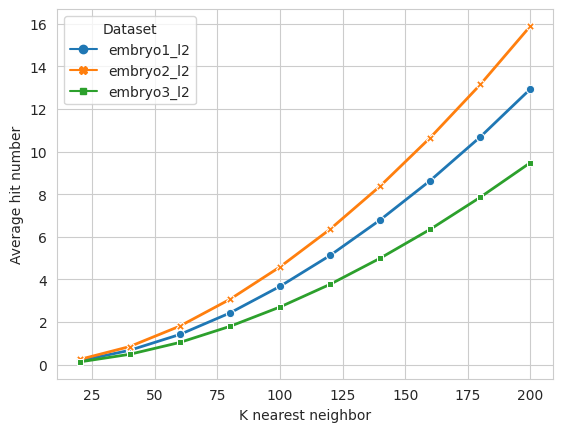

In [27]:
sns.set_style('whitegrid')
sns.lineplot(data=neighbor_hit_res,x="K nearest neighbor",y="Average hit number",hue="Dataset",markers=True,style='Dataset',\
             dashes=False,linewidth=2)

#### 2.5.2 Average JSD and  spearman's rank correlation coefficient


In [28]:
display(JSD_spearman_res)

,Dataset,Average JSD,Average spearman's rank correlation coefficient
0,embryo1_l2,0.589243,0.141367
1,embryo2_l2,0.520809,0.204060
2,embryo3_l2,0.624272,0.124664


## 3. Spatial location inference across platforms: human breast cancer datasets

### 3.1 Load data

In [13]:
DATA_ROOT = "../benchmarking_data"
human_breast_s06 = sc.read_h5ad(os.path.join(DATA_ROOT,"s06_normal.h5ad"))
human_breast_s08 = sc.read_h5ad(os.path.join(DATA_ROOT,"s08_normal.h5ad"))
print("human_breast_s06",human_breast_s06.shape,"human_breast_s08",human_breast_s08.shape)
train_adata = human_breast_s06

human_breast_s06 (3037, 36503) human_breast_s08 (2801, 36503)


### 3.2 Training the model


In [14]:
model_train = cel.Fit_cord (data_train = train_adata, \
                            location_data=np.column_stack((train_adata.obs['x'],train_adata.obs['y'])),\
                            path = "./ceLEry", filename = "celery_human_breast")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:05<00:00, 132.26it/s]


Epoch:1, Loss:59.1541


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:06<00:00, 108.86it/s]


Epoch:2, Loss:49.3526


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 87.92it/s]


Epoch:3, Loss:37.8284


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 83.84it/s]


Epoch:4, Loss:30.1763


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 85.22it/s]


Epoch:5, Loss:21.0927


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 85.88it/s]


Epoch:6, Loss:11.9722


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 86.63it/s]


Epoch:7, Loss:6.4614


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 86.10it/s]


Epoch:8, Loss:3.6729


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 86.71it/s]


Epoch:9, Loss:2.3436


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 86.50it/s]


Epoch:10, Loss:1.7789


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 83.56it/s]


Epoch:11, Loss:1.5571


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 85.80it/s]


Epoch:12, Loss:1.4175


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 85.91it/s]


Epoch:13, Loss:1.2914


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 87.54it/s]


Epoch:14, Loss:1.2885


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 87.24it/s]


Epoch:15, Loss:1.2264


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 88.20it/s]


Epoch:16, Loss:1.1888


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 87.73it/s]


Epoch:17, Loss:1.1290


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 89.40it/s]


Epoch:18, Loss:0.9937


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 84.23it/s]


Epoch:19, Loss:0.9395


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 85.50it/s]


Epoch:20, Loss:1.0298


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 86.31it/s]


Epoch:21, Loss:1.0670


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 82.85it/s]


Epoch:22, Loss:1.0301


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 82.72it/s]


Epoch:23, Loss:0.9263


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 78.12it/s]


Epoch:24, Loss:0.9614


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 82.91it/s]


Epoch:25, Loss:0.9251


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:22<00:00, 33.67it/s]


Epoch:26, Loss:0.8885


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:18<00:00, 40.45it/s]


Epoch:27, Loss:0.9179


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 81.25it/s]


Epoch:28, Loss:0.9081


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:08<00:00, 84.70it/s]


Epoch:29, Loss:0.9302


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 80.70it/s]


Epoch:30, Loss:0.8686


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 79.55it/s]


Epoch:31, Loss:0.8337


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 84.06it/s]


Epoch:32, Loss:0.8315


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:43<00:00, 17.61it/s]


Epoch:33, Loss:0.8485


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:14<00:00, 10.25it/s]


Epoch:34, Loss:0.8030


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:10<00:00, 10.82it/s]


Epoch:35, Loss:0.8156


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:21<00:00,  9.29it/s]


Epoch:36, Loss:0.7956


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:06<00:00, 11.38it/s]


Epoch:37, Loss:0.7734


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:30<00:00,  8.41it/s]


Epoch:38, Loss:0.8640


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:12<00:00, 10.52it/s]


Epoch:39, Loss:0.8999


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:24<00:00,  9.01it/s]


Epoch:40, Loss:0.7942


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:25<00:00, 29.40it/s]


Epoch:41, Loss:0.6894


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 82.45it/s]


Epoch:42, Loss:0.7187


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 80.65it/s]


Epoch:43, Loss:0.7522


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 81.03it/s]


Epoch:44, Loss:0.7314
New learning rate:5e-05


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 80.42it/s]


Epoch:45, Loss:0.6614


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 76.66it/s]


Epoch:46, Loss:0.1718


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 77.88it/s]


Epoch:47, Loss:0.0909


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 80.00it/s]


Epoch:48, Loss:0.0794


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 81.06it/s]


Epoch:49, Loss:0.1299


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 78.99it/s]


Epoch:50, Loss:0.3119


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 80.28it/s]


Epoch:51, Loss:0.4083


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 80.01it/s]


Epoch:52, Loss:0.2457


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:10<00:00, 75.97it/s]


Epoch:53, Loss:0.1537


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 78.12it/s]


Epoch:54, Loss:0.1476


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 81.09it/s]


Epoch:55, Loss:0.2126


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 82.32it/s]


Epoch:56, Loss:0.3036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 76.50it/s]


Epoch:57, Loss:0.2776


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 78.31it/s]


Epoch:58, Loss:0.2213


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:09<00:00, 76.79it/s]


Epoch:59, Loss:0.1861


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:10<00:00, 73.83it/s]


Epoch:60, Loss:0.1920


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:10<00:00, 71.21it/s]


Epoch:61, Loss:0.2340


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:11<00:00, 68.45it/s]


Epoch:62, Loss:0.2492


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:11<00:00, 66.83it/s]


Epoch:63, Loss:0.2189
New learning rate:2.5e-05


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:11<00:00, 63.95it/s]


Epoch:64, Loss:0.2021


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:12<00:00, 63.07it/s]


Epoch:65, Loss:0.0499


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 57.93it/s]


Epoch:66, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 58.42it/s]


Epoch:67, Loss:0.0280


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.94it/s]


Epoch:68, Loss:0.0353


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 57.99it/s]


Epoch:69, Loss:0.0855


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 56.17it/s]


Epoch:70, Loss:0.1411


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:51<00:00, 14.73it/s]


Epoch:71, Loss:0.0876


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:25<00:00,  8.84it/s]


Epoch:72, Loss:0.0540


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:39<00:00,  7.66it/s]


Epoch:73, Loss:0.0488


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:23<00:00,  9.10it/s]


Epoch:74, Loss:0.0570


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:23<00:00,  9.10it/s]


Epoch:75, Loss:0.0800


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:37<00:00,  7.83it/s]


Epoch:76, Loss:0.1018


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:22<00:00,  9.16it/s]


Epoch:77, Loss:0.0791


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:34<00:00, 22.17it/s]


Epoch:78, Loss:0.0634


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 56.89it/s]


Epoch:79, Loss:0.0623


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 57.55it/s]


Epoch:80, Loss:0.0672


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 58.19it/s]


Epoch:81, Loss:0.0781


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 56.55it/s]


Epoch:82, Loss:0.0792
New learning rate:1.25e-05


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.59it/s]


Epoch:83, Loss:0.0663


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.13it/s]


Epoch:84, Loss:0.0209


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.70it/s]


Epoch:85, Loss:0.0153


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.45it/s]


Epoch:86, Loss:0.0144


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:08<00:00, 11.13it/s]


Epoch:87, Loss:0.0164


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:42<00:00,  7.40it/s]


Epoch:88, Loss:0.0285


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:29<00:00,  8.54it/s]


Epoch:89, Loss:0.0469


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:29<00:00,  8.45it/s]


Epoch:90, Loss:0.0358


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:33<00:00,  8.17it/s]


Epoch:91, Loss:0.0216


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:37<00:00,  7.81it/s]


Epoch:92, Loss:0.0176


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:01<00:00, 12.29it/s]


Epoch:93, Loss:0.0211


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.37it/s]


Epoch:94, Loss:0.0296


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.10it/s]


Epoch:95, Loss:0.0336


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.29it/s]


Epoch:96, Loss:0.0294


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:15<00:00, 47.70it/s]


Epoch:97, Loss:0.0241


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:36<00:00,  7.88it/s]


Epoch:98, Loss:0.0228


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:45<00:00,  7.18it/s]


Epoch:99, Loss:0.0248


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:34<00:00,  8.03it/s]


Epoch:100, Loss:0.0277


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:45<00:00,  7.18it/s]


Epoch:101, Loss:0.0288
New learning rate:6.25e-06


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:50<00:00, 14.96it/s]


Epoch:102, Loss:0.0246


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.61it/s]


Epoch:103, Loss:0.0114


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.05it/s]


Epoch:104, Loss:0.0099


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.25it/s]


Epoch:105, Loss:0.0096


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.15it/s]


Epoch:106, Loss:0.0101


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.81it/s]


Epoch:107, Loss:0.0128


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.79it/s]


Epoch:108, Loss:0.0162


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:12<00:00, 10.49it/s]


Epoch:109, Loss:0.0143


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:05<00:00, 11.57it/s]


Epoch:110, Loss:0.0121


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:06<00:00, 11.36it/s]


Epoch:111, Loss:0.0110


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:12<00:00, 10.50it/s]


Epoch:112, Loss:0.0116


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:25<00:00,  8.88it/s]


Epoch:113, Loss:0.0128


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:22<00:00,  9.21it/s]


Epoch:114, Loss:0.0132


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:26<00:00,  8.76it/s]


Epoch:115, Loss:0.0130


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:08<00:00, 11.15it/s]


Epoch:116, Loss:0.0121


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:09<00:00, 10.88it/s]


Epoch:117, Loss:0.0115


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:26<00:00,  8.74it/s]


Epoch:118, Loss:0.0119


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:10<00:00, 10.81it/s]


Epoch:119, Loss:0.0120


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:44<00:00, 17.06it/s]


Epoch:120, Loss:0.0122
New learning rate:3.125e-06


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 50.72it/s]


Epoch:121, Loss:0.0112


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.14it/s]


Epoch:122, Loss:0.0078


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.26it/s]


Epoch:123, Loss:0.0074


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.44it/s]


Epoch:124, Loss:0.0074


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.24it/s]


Epoch:125, Loss:0.0076


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.78it/s]


Epoch:126, Loss:0.0082


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.17it/s]


Epoch:127, Loss:0.0088


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.67it/s]


Epoch:128, Loss:0.0083


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.56it/s]


Epoch:129, Loss:0.0078


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.42it/s]


Epoch:130, Loss:0.0075


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.35it/s]


Epoch:131, Loss:0.0077


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.55it/s]


Epoch:132, Loss:0.0079


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.34it/s]


Epoch:133, Loss:0.0078


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.76it/s]


Epoch:134, Loss:0.0076


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:02<00:00, 12.18it/s]


Epoch:135, Loss:0.0075


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:07<00:00, 11.24it/s]


Epoch:136, Loss:0.0076


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:26<00:00, 28.44it/s]


Epoch:137, Loss:0.0076


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.99it/s]


Epoch:138, Loss:0.0075
New learning rate:1.5625e-06


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 50.93it/s]


Epoch:139, Loss:0.0071


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.05it/s]


Epoch:140, Loss:0.0063


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:01<00:00, 12.29it/s]


Epoch:141, Loss:0.0062


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:48<00:00, 15.59it/s]


Epoch:142, Loss:0.0062


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.81it/s]


Epoch:143, Loss:0.0063


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.88it/s]


Epoch:144, Loss:0.0064


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 50.76it/s]


Epoch:145, Loss:0.0064


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.89it/s]


Epoch:146, Loss:0.0063


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:53<00:00, 14.18it/s]


Epoch:147, Loss:0.0062


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [01:05<00:00, 11.52it/s]


Epoch:148, Loss:0.0062


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:57<00:00, 13.12it/s]


Epoch:149, Loss:0.0062


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.68it/s]


Epoch:150, Loss:0.0061


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.80it/s]


Epoch:151, Loss:0.0061


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:15<00:00, 50.39it/s]


Epoch:152, Loss:0.0060


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:16<00:00, 46.33it/s]


Epoch:153, Loss:0.0060


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.79it/s]


Epoch:154, Loss:0.0060


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.04it/s]


Epoch:155, Loss:0.0059


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:15<00:00, 50.30it/s]


Epoch:156, Loss:0.0059


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:20<00:00, 36.58it/s]


Epoch:157, Loss:0.0059


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:34<00:00, 21.79it/s]


Epoch:158, Loss:0.0059


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.09it/s]


Epoch:159, Loss:0.0058


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.70it/s]


Epoch:160, Loss:0.0058


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.62it/s]


Epoch:161, Loss:0.0058


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.16it/s]


Epoch:162, Loss:0.0057


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.58it/s]


Epoch:163, Loss:0.0057


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.45it/s]


Epoch:164, Loss:0.0057


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 56.17it/s]


Epoch:165, Loss:0.0056


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.02it/s]


Epoch:166, Loss:0.0057


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.12it/s]


Epoch:167, Loss:0.0056


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.92it/s]


Epoch:168, Loss:0.0056


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.70it/s]


Epoch:169, Loss:0.0055


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.56it/s]


Epoch:170, Loss:0.0055


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.52it/s]


Epoch:171, Loss:0.0055


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.25it/s]


Epoch:172, Loss:0.0055


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.12it/s]


Epoch:173, Loss:0.0055


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.57it/s]


Epoch:174, Loss:0.0054


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.19it/s]


Epoch:175, Loss:0.0054


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:16<00:00, 46.89it/s]


Epoch:176, Loss:0.0054


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:16<00:00, 46.08it/s]


Epoch:177, Loss:0.0054


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:16<00:00, 45.37it/s]


Epoch:178, Loss:0.0054


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.99it/s]


Epoch:179, Loss:0.0053


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.93it/s]


Epoch:180, Loss:0.0053


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.95it/s]


Epoch:181, Loss:0.0053


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:15<00:00, 50.39it/s]


Epoch:182, Loss:0.0053


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.98it/s]


Epoch:183, Loss:0.0053


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.47it/s]


Epoch:184, Loss:0.0052


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.96it/s]


Epoch:185, Loss:0.0052


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.36it/s]


Epoch:186, Loss:0.0052


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.03it/s]


Epoch:187, Loss:0.0052


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.40it/s]


Epoch:188, Loss:0.0052


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.51it/s]


Epoch:189, Loss:0.0051


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.25it/s]


Epoch:190, Loss:0.0051


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.47it/s]


Epoch:191, Loss:0.0051


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.34it/s]


Epoch:192, Loss:0.0051


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.71it/s]


Epoch:193, Loss:0.0051


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.29it/s]


Epoch:194, Loss:0.0050


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.16it/s]


Epoch:195, Loss:0.0050


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.54it/s]


Epoch:196, Loss:0.0050


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.28it/s]


Epoch:197, Loss:0.0050
New learning rate:7.8125e-07


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.29it/s]


Epoch:198, Loss:0.0049


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.82it/s]


Epoch:199, Loss:0.0046


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.45it/s]


Epoch:200, Loss:0.0046


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.76it/s]


Epoch:201, Loss:0.0046


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.77it/s]


Epoch:202, Loss:0.0046


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.61it/s]


Epoch:203, Loss:0.0046


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.32it/s]


Epoch:204, Loss:0.0046


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.38it/s]


Epoch:205, Loss:0.0046


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.20it/s]


Epoch:206, Loss:0.0046


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.97it/s]


Epoch:207, Loss:0.0046


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.60it/s]


Epoch:208, Loss:0.0045


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.87it/s]


Epoch:209, Loss:0.0046


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.49it/s]


Epoch:210, Loss:0.0045


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.07it/s]


Epoch:211, Loss:0.0045


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.03it/s]


Epoch:212, Loss:0.0045


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.83it/s]


Epoch:213, Loss:0.0045


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.60it/s]


Epoch:214, Loss:0.0045


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.56it/s]


Epoch:215, Loss:0.0045


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.15it/s]


Epoch:216, Loss:0.0045


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.56it/s]


Epoch:217, Loss:0.0044


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.06it/s]


Epoch:218, Loss:0.0044


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.54it/s]


Epoch:219, Loss:0.0044


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.71it/s]


Epoch:220, Loss:0.0044


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.06it/s]


Epoch:221, Loss:0.0044


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.21it/s]


Epoch:222, Loss:0.0044


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.54it/s]


Epoch:223, Loss:0.0044


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.16it/s]


Epoch:224, Loss:0.0043


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.37it/s]


Epoch:225, Loss:0.0043


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.08it/s]


Epoch:226, Loss:0.0043


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.93it/s]


Epoch:227, Loss:0.0043


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.52it/s]


Epoch:228, Loss:0.0043


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.95it/s]


Epoch:229, Loss:0.0043


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:15<00:00, 50.38it/s]


Epoch:230, Loss:0.0043


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.83it/s]


Epoch:231, Loss:0.0043


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.65it/s]


Epoch:232, Loss:0.0043


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.94it/s]


Epoch:233, Loss:0.0042


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.01it/s]


Epoch:234, Loss:0.0042


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.64it/s]


Epoch:235, Loss:0.0042


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.78it/s]


Epoch:236, Loss:0.0042


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.83it/s]


Epoch:237, Loss:0.0042


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.15it/s]


Epoch:238, Loss:0.0042


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.94it/s]


Epoch:239, Loss:0.0042


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.99it/s]


Epoch:240, Loss:0.0042


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.93it/s]


Epoch:241, Loss:0.0042


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.49it/s]


Epoch:242, Loss:0.0041


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.09it/s]


Epoch:243, Loss:0.0041


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.67it/s]


Epoch:244, Loss:0.0041


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.38it/s]


Epoch:245, Loss:0.0041


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 50.91it/s]


Epoch:246, Loss:0.0041


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.39it/s]


Epoch:247, Loss:0.0041


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.66it/s]


Epoch:248, Loss:0.0041


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.25it/s]


Epoch:249, Loss:0.0041


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.60it/s]


Epoch:250, Loss:0.0041


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.45it/s]


Epoch:251, Loss:0.0042


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.00it/s]


Epoch:252, Loss:0.0041


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 50.99it/s]


Epoch:253, Loss:0.0040


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.19it/s]


Epoch:254, Loss:0.0040


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.62it/s]


Epoch:255, Loss:0.0040


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.61it/s]


Epoch:256, Loss:0.0040


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.67it/s]


Epoch:257, Loss:0.0040


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.56it/s]


Epoch:258, Loss:0.0040


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.96it/s]


Epoch:259, Loss:0.0040


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.87it/s]


Epoch:260, Loss:0.0040


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.02it/s]


Epoch:261, Loss:0.0040


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.35it/s]


Epoch:262, Loss:0.0040


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.66it/s]


Epoch:263, Loss:0.0039


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.86it/s]


Epoch:264, Loss:0.0039


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 56.16it/s]


Epoch:265, Loss:0.0039


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.49it/s]


Epoch:266, Loss:0.0039


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.14it/s]


Epoch:267, Loss:0.0039


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.22it/s]


Epoch:268, Loss:0.0039


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.09it/s]


Epoch:269, Loss:0.0039


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.07it/s]


Epoch:270, Loss:0.0039


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.15it/s]


Epoch:271, Loss:0.0039


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.96it/s]


Epoch:272, Loss:0.0039


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.70it/s]


Epoch:273, Loss:0.0039


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 50.83it/s]


Epoch:274, Loss:0.0038


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.44it/s]


Epoch:275, Loss:0.0038


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.32it/s]


Epoch:276, Loss:0.0038


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.43it/s]


Epoch:277, Loss:0.0038


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.15it/s]


Epoch:278, Loss:0.0038
New learning rate:3.90625e-07


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.54it/s]


Epoch:279, Loss:0.0038


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.11it/s]


Epoch:280, Loss:0.0037


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.75it/s]


Epoch:281, Loss:0.0037


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.66it/s]


Epoch:282, Loss:0.0037


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.97it/s]


Epoch:283, Loss:0.0037


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.76it/s]


Epoch:284, Loss:0.0037


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.72it/s]


Epoch:285, Loss:0.0037


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.11it/s]


Epoch:286, Loss:0.0037


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.10it/s]


Epoch:287, Loss:0.0037


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.40it/s]


Epoch:288, Loss:0.0037


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.58it/s]


Epoch:289, Loss:0.0037


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.00it/s]


Epoch:290, Loss:0.0037


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.27it/s]


Epoch:291, Loss:0.0037


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.39it/s]


Epoch:292, Loss:0.0037


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 56.55it/s]


Epoch:293, Loss:0.0037


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 56.25it/s]


Epoch:294, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.60it/s]


Epoch:295, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.26it/s]


Epoch:296, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.20it/s]


Epoch:297, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.20it/s]


Epoch:298, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.26it/s]


Epoch:299, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:15<00:00, 50.44it/s]


Epoch:300, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.39it/s]


Epoch:301, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.00it/s]


Epoch:302, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.17it/s]


Epoch:303, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.75it/s]


Epoch:304, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.70it/s]


Epoch:305, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.86it/s]


Epoch:306, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.61it/s]


Epoch:307, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.95it/s]


Epoch:308, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.14it/s]


Epoch:309, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.28it/s]


Epoch:310, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.37it/s]


Epoch:311, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.21it/s]


Epoch:312, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.22it/s]


Epoch:313, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 50.93it/s]


Epoch:314, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.38it/s]


Epoch:315, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.55it/s]


Epoch:316, Loss:0.0035


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.77it/s]


Epoch:317, Loss:0.0036


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.67it/s]


Epoch:318, Loss:0.0035


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.71it/s]


Epoch:319, Loss:0.0035


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.01it/s]


Epoch:320, Loss:0.0035


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.24it/s]


Epoch:321, Loss:0.0035


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.63it/s]


Epoch:322, Loss:0.0035


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.20it/s]


Epoch:323, Loss:0.0035


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.01it/s]


Epoch:324, Loss:0.0035


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.63it/s]


Epoch:325, Loss:0.0035


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.19it/s]


Epoch:326, Loss:0.0035


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.75it/s]


Epoch:327, Loss:0.0035


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.95it/s]


Epoch:328, Loss:0.0035


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.07it/s]


Epoch:329, Loss:0.0035


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.36it/s]


Epoch:330, Loss:0.0035


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.91it/s]


Epoch:331, Loss:0.0035


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.44it/s]


Epoch:332, Loss:0.0035


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.30it/s]


Epoch:333, Loss:0.0035


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.92it/s]


Epoch:334, Loss:0.0035


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 56.18it/s]


Epoch:335, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.50it/s]


Epoch:336, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.77it/s]


Epoch:337, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.58it/s]


Epoch:338, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.44it/s]


Epoch:339, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.81it/s]


Epoch:340, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.66it/s]


Epoch:341, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.42it/s]


Epoch:342, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.40it/s]


Epoch:343, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.34it/s]


Epoch:344, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.77it/s]


Epoch:345, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.01it/s]


Epoch:346, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.00it/s]


Epoch:347, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.85it/s]


Epoch:348, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.85it/s]


Epoch:349, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.49it/s]


Epoch:350, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.14it/s]


Epoch:351, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.98it/s]


Epoch:352, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.70it/s]


Epoch:353, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.27it/s]


Epoch:354, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.84it/s]


Epoch:355, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.35it/s]


Epoch:356, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.65it/s]


Epoch:357, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.10it/s]


Epoch:358, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.90it/s]


Epoch:359, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.57it/s]


Epoch:360, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.59it/s]


Epoch:361, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.51it/s]


Epoch:362, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 50.76it/s]


Epoch:363, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 50.72it/s]


Epoch:364, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.96it/s]


Epoch:365, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.26it/s]


Epoch:366, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.62it/s]


Epoch:367, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.53it/s]


Epoch:368, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.77it/s]


Epoch:369, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.43it/s]


Epoch:370, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.23it/s]


Epoch:371, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.32it/s]


Epoch:372, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.85it/s]


Epoch:373, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.91it/s]


Epoch:374, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.28it/s]


Epoch:375, Loss:0.0033


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.20it/s]


Epoch:376, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.55it/s]


Epoch:377, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.99it/s]


Epoch:378, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.05it/s]


Epoch:379, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.84it/s]


Epoch:380, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.00it/s]


Epoch:381, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.86it/s]


Epoch:382, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.11it/s]


Epoch:383, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.48it/s]


Epoch:384, Loss:0.0034


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.22it/s]


Epoch:385, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.23it/s]


Epoch:386, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.75it/s]


Epoch:387, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.47it/s]


Epoch:388, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.45it/s]


Epoch:389, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.60it/s]


Epoch:390, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.08it/s]


Epoch:391, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.96it/s]


Epoch:392, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.47it/s]


Epoch:393, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.87it/s]


Epoch:394, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.85it/s]


Epoch:395, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.37it/s]


Epoch:396, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.22it/s]


Epoch:397, Loss:0.0032


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.47it/s]


Epoch:398, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.57it/s]


Epoch:399, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.78it/s]


Epoch:400, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.46it/s]


Epoch:401, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.77it/s]


Epoch:402, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.14it/s]


Epoch:403, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.89it/s]


Epoch:404, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.95it/s]


Epoch:405, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.63it/s]


Epoch:406, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.82it/s]


Epoch:407, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.79it/s]


Epoch:408, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.05it/s]


Epoch:409, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.37it/s]


Epoch:410, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.68it/s]


Epoch:411, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.40it/s]


Epoch:412, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.62it/s]


Epoch:413, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.91it/s]


Epoch:414, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.23it/s]


Epoch:415, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.06it/s]


Epoch:416, Loss:0.0031


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.92it/s]


Epoch:417, Loss:0.0030


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 56.11it/s]


Epoch:418, Loss:0.0030


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.82it/s]


Epoch:419, Loss:0.0030


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.40it/s]


Epoch:420, Loss:0.0030


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.61it/s]


Epoch:421, Loss:0.0030


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.25it/s]


Epoch:422, Loss:0.0030


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.20it/s]


Epoch:423, Loss:0.0030


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.51it/s]


Epoch:424, Loss:0.0030


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.54it/s]


Epoch:425, Loss:0.0030


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.25it/s]


Epoch:426, Loss:0.0030


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.16it/s]


Epoch:427, Loss:0.0030


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 56.53it/s]


Epoch:428, Loss:0.0030


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.35it/s]


Epoch:429, Loss:0.0030


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.15it/s]


Epoch:430, Loss:0.0030


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.15it/s]


Epoch:431, Loss:0.0030


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.36it/s]


Epoch:432, Loss:0.0030


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.08it/s]


Epoch:433, Loss:0.0030
New learning rate:1.953125e-07


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.28it/s]


Epoch:434, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.10it/s]


Epoch:435, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.31it/s]


Epoch:436, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.09it/s]


Epoch:437, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.96it/s]


Epoch:438, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.13it/s]


Epoch:439, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.62it/s]


Epoch:440, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.97it/s]


Epoch:441, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.00it/s]


Epoch:442, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.25it/s]


Epoch:443, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.19it/s]


Epoch:444, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.53it/s]


Epoch:445, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.43it/s]


Epoch:446, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.17it/s]


Epoch:447, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.33it/s]


Epoch:448, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 56.32it/s]


Epoch:449, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.35it/s]


Epoch:450, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.88it/s]


Epoch:451, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.19it/s]


Epoch:452, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.19it/s]


Epoch:453, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.33it/s]


Epoch:454, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.77it/s]


Epoch:455, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.59it/s]


Epoch:456, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.07it/s]


Epoch:457, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.27it/s]


Epoch:458, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.85it/s]


Epoch:459, Loss:0.0030


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.05it/s]


Epoch:460, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.52it/s]


Epoch:461, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.02it/s]


Epoch:462, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.96it/s]


Epoch:463, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.45it/s]


Epoch:464, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.64it/s]


Epoch:465, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:15<00:00, 50.50it/s]


Epoch:466, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.86it/s]


Epoch:467, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.25it/s]


Epoch:468, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.02it/s]


Epoch:469, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.17it/s]


Epoch:470, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.95it/s]


Epoch:471, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.39it/s]


Epoch:472, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.03it/s]


Epoch:473, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.81it/s]


Epoch:474, Loss:0.0029


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.35it/s]


Epoch:475, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.44it/s]


Epoch:476, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.18it/s]


Epoch:477, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.99it/s]


Epoch:478, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.98it/s]


Epoch:479, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 51.55it/s]


Epoch:480, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.13it/s]


Epoch:481, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:15<00:00, 50.49it/s]


Epoch:482, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.05it/s]


Epoch:483, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.68it/s]


Epoch:484, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.34it/s]


Epoch:485, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.03it/s]


Epoch:486, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.41it/s]


Epoch:487, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 52.60it/s]


Epoch:488, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.37it/s]


Epoch:489, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.01it/s]


Epoch:490, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.00it/s]


Epoch:491, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 54.17it/s]


Epoch:492, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 56.06it/s]


Epoch:493, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.48it/s]


Epoch:494, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.41it/s]


Epoch:495, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.24it/s]


Epoch:496, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 55.89it/s]


Epoch:497, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.46it/s]


Epoch:498, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:13<00:00, 54.65it/s]


Epoch:499, Loss:0.0028


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 760/760 [00:14<00:00, 53.85it/s]

Epoch:500, Loss:0.0028
Folder already exists


### 3.3 Evaluation

In [16]:

neighbor_hit_res = {'Dataset':[],'K nearest neighbor':[],'Average hit number':[]}
JSD_spearman_res = {'Dataset':[],'Average JSD':[],"Average spearman's rank correlation coefficient":[]}
res_summary_all   = {"Dataset":[],"Cell type":[],"Average JSD":[],"Average spearman":[]}
test_name = "10X visium S08"
cur_test_adata = human_breast_s08
cur_truth_coor = np.column_stack((cur_test_adata.obs['x'].values,cur_test_adata.obs['y'].values))
    
logging.info("Model inference for "+test_name)
predicted_coor = cel.Predict_cord (data_test = cur_test_adata,location_data=cur_truth_coor,path = SAVE_ROOT, filename = "celery_human_breast")
logging.info("Inference DONE")
        
predicted_distances =  cdist(predicted_coor, predicted_coor)
predicted_sorted_ind = np.argsort(predicted_distances)
    
truth_distances =  cdist(cur_truth_coor, cur_truth_coor)
truth_sorted_ind = np.argsort(truth_distances)
    
# neighbor hit
cur_neighbor_res,cur_average_neighbor_res = utils.calNeiborHit(truth_sorted_ind,predicted_sorted_ind)
neighbor_hit_res['Dataset'].extend([test_name]*10)
neighbor_hit_res['K nearest neighbor'].extend(cur_average_neighbor_res['K nearest neighbor'])
neighbor_hit_res['Average hit number'].extend(cur_average_neighbor_res['Average hit number'])
    
# JSD
cur_truth_cell_types = cur_test_adata.obs['cell_type'].values
cur_jsd_list = utils.calJSD(truth_sorted_ind,predicted_sorted_ind,cur_truth_cell_types,neighbor_num=20)
    
# Spearman rank correlation
spearman_corr_list,spearman_p_list = utils.calSpearmanRank(predicted_distances,truth_distances)
    
JSD_spearman_res['Dataset'].append(test_name)
JSD_spearman_res['Average JSD'].append(np.mean(cur_jsd_list))
JSD_spearman_res["Average spearman's rank correlation coefficient"].append(np.mean(spearman_corr_list))
    
res_summary_all['Dataset'].extend([test_name]*len(cur_truth_cell_types))
res_summary_all['Cell type'].extend(cur_truth_cell_types)
res_summary_all['Average JSD'].extend(cur_jsd_list)
res_summary_all['Average spearman'].extend(spearman_corr_list)


neighbor_hit_res = pd.DataFrame(neighbor_hit_res)
JSD_spearman_res = pd.DataFrame(JSD_spearman_res)
res_summary_all = pd.DataFrame(res_summary_all)

INFO:root:Model inference for 10X visium S08
INFO:root:Inference DONE
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2801/2801 [00:03<00:00, 783.56it/s]


In [17]:
res_summary_all.to_csv("results/ceLEry_human_breast.csv")

### 3.4 Benchmarking results

#### 3.4.1 Nearest neighbor hit

<Axes: xlabel='K nearest neighbor', ylabel='Average hit number'>

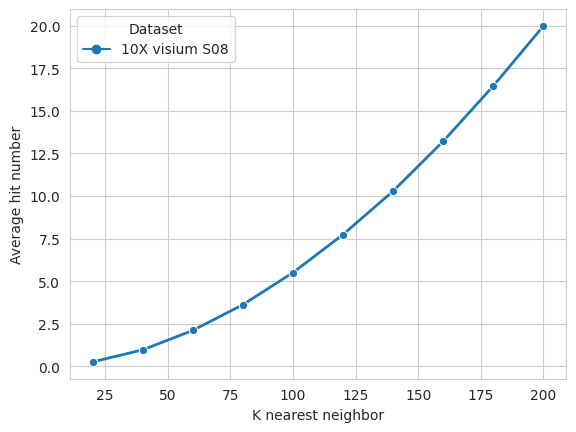

In [18]:
sns.set_style('whitegrid')
sns.lineplot(data=neighbor_hit_res,x="K nearest neighbor",y="Average hit number",hue="Dataset",markers=True,style='Dataset',\
             dashes=False,linewidth=2)

#### 3.4.2 Average JSD and spearman's rank correlation coefficient

In [19]:
display(JSD_spearman_res)

,Dataset,Average JSD,Average spearman's rank correlation coefficient
0,10X visium S08,0.465271,0.077497


## 4. Spatial location inference: mouse brain cells generated by MERSCOPE

### 4.1. Load data

In [63]:
DATA_ROOT = "../benchmarking_data"
left_brain_adata = sc.read_h5ad(os.path.join(DATA_ROOT,"s1r1_left_original.h5ad"))
right_brain_adata = sc.read_h5ad(os.path.join(DATA_ROOT,"s1r1_right_original.h5ad"))

### 4.2 Training the model


In [ ]:
train_adata = left_brain_adata
model_train = cel.Fit_cord (data_train = train_adata, \
                            location_data=np.column_stack((train_adata.obs['x'],train_adata.obs['y'])),\
                            path = "./ceLEry", filename = "celery_merfish")

100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:21<00:00, 101.57it/s]


Epoch:1, Loss:85.0439


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:21<00:00, 102.76it/s]


Epoch:2, Loss:41.7135


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:21<00:00, 101.63it/s]


Epoch:3, Loss:35.5838


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:21<00:00, 102.39it/s]


Epoch:4, Loss:32.7730


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:21<00:00, 101.50it/s]


Epoch:5, Loss:30.6425


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.60it/s]


Epoch:6, Loss:28.8684


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.61it/s]


Epoch:7, Loss:27.4069


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.80it/s]


Epoch:8, Loss:25.9511


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.24it/s]


Epoch:9, Loss:24.8052


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 100.61it/s]


Epoch:10, Loss:23.6483


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.82it/s]


Epoch:11, Loss:22.4877


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.68it/s]


Epoch:12, Loss:21.6201


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:21<00:00, 105.79it/s]


Epoch:13, Loss:20.4114


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:18<00:00, 123.70it/s]


Epoch:14, Loss:19.6580


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:15<00:00, 141.57it/s]


Epoch:15, Loss:18.6694


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:16<00:00, 132.67it/s]


Epoch:16, Loss:17.9162


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:17<00:00, 126.34it/s]


Epoch:17, Loss:17.0241


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:18<00:00, 119.11it/s]


Epoch:18, Loss:16.3508


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:16<00:00, 137.68it/s]


Epoch:19, Loss:15.7070


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:17<00:00, 128.06it/s]


Epoch:20, Loss:15.0845


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:17<00:00, 130.78it/s]


Epoch:21, Loss:14.4726


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.34it/s]


Epoch:22, Loss:13.8697


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.60it/s]


Epoch:23, Loss:13.3308


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.86it/s]


Epoch:24, Loss:12.9110


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 100.95it/s]


Epoch:25, Loss:12.4641


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 97.25it/s]


Epoch:26, Loss:11.9479


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 100.77it/s]


Epoch:27, Loss:11.4671


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 100.30it/s]


Epoch:28, Loss:11.1355


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 97.81it/s]


Epoch:29, Loss:10.7069


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.46it/s]


Epoch:30, Loss:10.4005


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 97.90it/s]


Epoch:31, Loss:10.0638


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.02it/s]


Epoch:32, Loss:9.6684


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.66it/s]


Epoch:33, Loss:9.3924


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 97.31it/s]


Epoch:34, Loss:9.1426


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.86it/s]


Epoch:35, Loss:8.8510


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 97.93it/s]


Epoch:36, Loss:8.6638


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.93it/s]


Epoch:37, Loss:8.3589


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.11it/s]


Epoch:38, Loss:8.1189


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.17it/s]


Epoch:39, Loss:8.0329


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.17it/s]


Epoch:40, Loss:7.7785


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.27it/s]


Epoch:41, Loss:7.4748


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.80it/s]


Epoch:42, Loss:7.3687


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.51it/s]


Epoch:43, Loss:7.1248


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.70it/s]


Epoch:44, Loss:7.0042


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.71it/s]


Epoch:45, Loss:6.8375


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.78it/s]


Epoch:46, Loss:6.7089


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.99it/s]


Epoch:47, Loss:6.5686


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:21<00:00, 102.90it/s]


Epoch:48, Loss:6.4341


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:17<00:00, 130.63it/s]


Epoch:49, Loss:6.2381


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:17<00:00, 129.87it/s]


Epoch:50, Loss:6.1839


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:17<00:00, 127.27it/s]


Epoch:51, Loss:6.0174


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:20<00:00, 107.09it/s]


Epoch:52, Loss:5.9812


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.96it/s]


Epoch:53, Loss:5.8108


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:19<00:00, 113.19it/s]


Epoch:54, Loss:5.7302


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.15it/s]


Epoch:55, Loss:5.6077


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:23<00:00, 96.67it/s]


Epoch:56, Loss:5.5335


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.26it/s]


Epoch:57, Loss:5.3930


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.53it/s]


Epoch:58, Loss:5.3493


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.81it/s]


Epoch:59, Loss:5.2282


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.34it/s]


Epoch:60, Loss:5.1527


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.47it/s]


Epoch:61, Loss:5.1200


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.15it/s]


Epoch:62, Loss:4.9421


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.58it/s]


Epoch:63, Loss:4.9588


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.43it/s]


Epoch:64, Loss:4.8477


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.63it/s]


Epoch:65, Loss:4.8095


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 97.06it/s]


Epoch:66, Loss:4.6992


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.17it/s]


Epoch:67, Loss:4.7106


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.67it/s]


Epoch:68, Loss:4.6253


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.14it/s]


Epoch:69, Loss:4.5121


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.29it/s]


Epoch:70, Loss:4.5020


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.97it/s]


Epoch:71, Loss:4.4539


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 97.58it/s]


Epoch:72, Loss:4.3699


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.66it/s]


Epoch:73, Loss:4.3128


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 100.19it/s]


Epoch:74, Loss:4.3417


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.27it/s]


Epoch:75, Loss:4.2173


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:21<00:00, 101.78it/s]


Epoch:76, Loss:4.1345


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:21<00:00, 101.97it/s]


Epoch:77, Loss:4.1112


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 99.68it/s]


Epoch:78, Loss:4.1583


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 101.27it/s]


Epoch:79, Loss:3.9949


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:21<00:00, 101.57it/s]


Epoch:80, Loss:4.0302


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.27it/s]


Epoch:81, Loss:3.9423


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 98.95it/s]


Epoch:82, Loss:3.9879


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:18<00:00, 120.53it/s]


Epoch:83, Loss:3.8313


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 100.86it/s]


Epoch:84, Loss:3.8111


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:18<00:00, 120.70it/s]


Epoch:85, Loss:3.8250


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:18<00:00, 120.36it/s]


Epoch:86, Loss:3.7590


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:19<00:00, 115.22it/s]


Epoch:87, Loss:3.7443


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:17<00:00, 129.19it/s]


Epoch:88, Loss:3.6743


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.16it/s]


Epoch:89, Loss:3.6944


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 174.01it/s]


Epoch:90, Loss:3.6132


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 175.19it/s]


Epoch:91, Loss:3.5719


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.65it/s]


Epoch:92, Loss:3.5580


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.84it/s]


Epoch:93, Loss:3.5458


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 177.75it/s]


Epoch:94, Loss:3.5529


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 173.67it/s]


Epoch:95, Loss:3.4596


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 171.81it/s]


Epoch:96, Loss:3.4719


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 166.77it/s]


Epoch:97, Loss:3.5005


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 164.24it/s]


Epoch:98, Loss:3.3940


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 165.24it/s]


Epoch:99, Loss:3.3898


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 168.73it/s]


Epoch:100, Loss:3.3632


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 180.06it/s]


Epoch:101, Loss:3.3926


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.61it/s]


Epoch:102, Loss:3.2825


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 170.24it/s]


Epoch:103, Loss:3.3602


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.31it/s]


Epoch:104, Loss:3.2658


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.14it/s]


Epoch:105, Loss:3.2461


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 176.82it/s]


Epoch:106, Loss:3.1903


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 176.70it/s]


Epoch:107, Loss:3.1970


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.53it/s]


Epoch:108, Loss:3.2467
New learning rate:5e-05


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 166.27it/s]


Epoch:109, Loss:2.6748


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 170.21it/s]


Epoch:110, Loss:2.5503


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 176.24it/s]


Epoch:111, Loss:2.5190


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 166.78it/s]


Epoch:112, Loss:2.5101


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 167.48it/s]


Epoch:113, Loss:2.4796


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 165.27it/s]


Epoch:114, Loss:2.4530


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 163.18it/s]


Epoch:115, Loss:2.4407


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 174.97it/s]


Epoch:116, Loss:2.4268


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.41it/s]


Epoch:117, Loss:2.3967


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 175.95it/s]


Epoch:118, Loss:2.3999


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 166.32it/s]


Epoch:119, Loss:2.3598


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 165.36it/s]


Epoch:120, Loss:2.3646


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 163.74it/s]


Epoch:121, Loss:2.3488


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 170.11it/s]


Epoch:122, Loss:2.3305


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.17it/s]


Epoch:123, Loss:2.3318


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 167.34it/s]


Epoch:124, Loss:2.3119


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.32it/s]


Epoch:125, Loss:2.3004


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 162.75it/s]


Epoch:126, Loss:2.2813


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 165.63it/s]


Epoch:127, Loss:2.2668


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 162.35it/s]


Epoch:128, Loss:2.2641


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:16<00:00, 134.69it/s]


Epoch:129, Loss:2.2457


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:23<00:00, 92.99it/s]


Epoch:130, Loss:2.2354


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:21<00:00, 103.82it/s]


Epoch:131, Loss:2.2112


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:20<00:00, 109.44it/s]


Epoch:132, Loss:2.2055


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:25<00:00, 88.78it/s]


Epoch:133, Loss:2.2084


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:18<00:00, 120.01it/s]


Epoch:134, Loss:2.1807


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:23<00:00, 95.23it/s]


Epoch:135, Loss:2.2043


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:23<00:00, 94.44it/s]


Epoch:136, Loss:2.1622


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:23<00:00, 94.40it/s]


Epoch:137, Loss:2.1794


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:21<00:00, 104.46it/s]


Epoch:138, Loss:2.1654


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:22<00:00, 97.97it/s]


Epoch:139, Loss:2.1354


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:23<00:00, 94.87it/s]


Epoch:140, Loss:2.1338


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:23<00:00, 96.24it/s]


Epoch:141, Loss:2.1256


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:23<00:00, 96.35it/s]


Epoch:142, Loss:2.1189


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:21<00:00, 104.72it/s]


Epoch:143, Loss:2.1132


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 165.45it/s]


Epoch:144, Loss:2.0809


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 159.64it/s]


Epoch:145, Loss:2.0988


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 153.63it/s]


Epoch:146, Loss:2.0787


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:15<00:00, 147.58it/s]


Epoch:147, Loss:2.0737


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 151.56it/s]


Epoch:148, Loss:2.0772


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 154.51it/s]


Epoch:149, Loss:2.0554


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 156.58it/s]


Epoch:150, Loss:2.0410


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 161.71it/s]


Epoch:151, Loss:2.0303


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 158.35it/s]


Epoch:152, Loss:2.0471


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 158.17it/s]


Epoch:153, Loss:2.0148


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 159.03it/s]


Epoch:154, Loss:2.0007


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 162.15it/s]


Epoch:155, Loss:2.0404


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 156.75it/s]


Epoch:156, Loss:2.0123


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 154.23it/s]


Epoch:157, Loss:1.9875


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 152.25it/s]


Epoch:158, Loss:1.9753


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 163.25it/s]


Epoch:159, Loss:1.9989


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.78it/s]


Epoch:160, Loss:1.9616


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 168.79it/s]


Epoch:161, Loss:1.9533


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 173.56it/s]


Epoch:162, Loss:1.9428


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 170.90it/s]


Epoch:163, Loss:1.9815


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 168.38it/s]


Epoch:164, Loss:1.9670
New learning rate:2.5e-05


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 167.27it/s]


Epoch:165, Loss:1.7451


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 166.37it/s]


Epoch:166, Loss:1.6894


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.74it/s]


Epoch:167, Loss:1.6878


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 167.41it/s]


Epoch:168, Loss:1.6769


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 168.81it/s]


Epoch:169, Loss:1.6711


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.49it/s]


Epoch:170, Loss:1.6663


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.34it/s]


Epoch:171, Loss:1.6463


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.90it/s]


Epoch:172, Loss:1.6464


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.40it/s]


Epoch:173, Loss:1.6479


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 151.37it/s]


Epoch:174, Loss:1.6417


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 171.70it/s]


Epoch:175, Loss:1.6391


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 174.22it/s]


Epoch:176, Loss:1.6332


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 168.00it/s]


Epoch:177, Loss:1.6219


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 165.14it/s]


Epoch:178, Loss:1.6176


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 168.28it/s]


Epoch:179, Loss:1.6135


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.01it/s]


Epoch:180, Loss:1.6147


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.71it/s]


Epoch:181, Loss:1.5991


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 167.10it/s]


Epoch:182, Loss:1.6086


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 170.58it/s]


Epoch:183, Loss:1.6001


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.28it/s]


Epoch:184, Loss:1.5879


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 166.86it/s]


Epoch:185, Loss:1.5862


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 168.43it/s]


Epoch:186, Loss:1.5866


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.28it/s]


Epoch:187, Loss:1.5814


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.10it/s]


Epoch:188, Loss:1.5763


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 170.65it/s]


Epoch:189, Loss:1.5729


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 170.47it/s]


Epoch:190, Loss:1.5676


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.51it/s]


Epoch:191, Loss:1.5702


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 171.94it/s]


Epoch:192, Loss:1.5631


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:17<00:00, 130.14it/s]


Epoch:193, Loss:1.5619


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:43<00:00, 51.64it/s]


Epoch:194, Loss:1.5595


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:43<00:00, 51.00it/s]


Epoch:195, Loss:1.5534


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:43<00:00, 50.89it/s]


Epoch:196, Loss:1.5480


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:45<00:00, 49.42it/s]


Epoch:197, Loss:1.5435


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:40<00:00, 54.97it/s]


Epoch:198, Loss:1.5297


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:44<00:00, 50.01it/s]


Epoch:199, Loss:1.5352


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:43<00:00, 51.00it/s]


Epoch:200, Loss:1.5354


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:44<00:00, 50.46it/s]


Epoch:201, Loss:1.5258


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:42<00:00, 52.47it/s]


Epoch:202, Loss:1.5224


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:43<00:00, 51.07it/s]


Epoch:203, Loss:1.5255


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:43<00:00, 51.10it/s]


Epoch:204, Loss:1.5241


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:43<00:00, 51.26it/s]


Epoch:205, Loss:1.5073


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:41<00:00, 54.39it/s]


Epoch:206, Loss:1.5103


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:43<00:00, 51.82it/s]


Epoch:207, Loss:1.5048


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:43<00:00, 51.46it/s]


Epoch:208, Loss:1.5079


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:41<00:00, 53.48it/s]


Epoch:209, Loss:1.4949


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:43<00:00, 51.52it/s]


Epoch:210, Loss:1.4977


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:43<00:00, 51.54it/s]


Epoch:211, Loss:1.4946


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:42<00:00, 52.74it/s]


Epoch:212, Loss:1.4880


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:38<00:00, 58.07it/s]


Epoch:213, Loss:1.4837


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:39<00:00, 56.82it/s]


Epoch:214, Loss:1.4886
New learning rate:1.25e-05


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:40<00:00, 55.54it/s]


Epoch:215, Loss:1.3939


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:40<00:00, 55.55it/s]


Epoch:216, Loss:1.3845


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:43<00:00, 50.88it/s]


Epoch:217, Loss:1.3808


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:42<00:00, 51.94it/s]


Epoch:218, Loss:1.3766


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:42<00:00, 52.09it/s]


Epoch:219, Loss:1.3722


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:43<00:00, 51.42it/s]


Epoch:220, Loss:1.3693


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:41<00:00, 54.25it/s]


Epoch:221, Loss:1.3715


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:43<00:00, 51.15it/s]


Epoch:222, Loss:1.3645


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:44<00:00, 50.49it/s]


Epoch:223, Loss:1.3624


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:42<00:00, 52.22it/s]


Epoch:224, Loss:1.3639


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:43<00:00, 51.77it/s]


Epoch:225, Loss:1.3595


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:44<00:00, 50.34it/s]


Epoch:226, Loss:1.3578


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:43<00:00, 51.28it/s]


Epoch:227, Loss:1.3544


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:44<00:00, 50.51it/s]


Epoch:228, Loss:1.3525


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:43<00:00, 51.35it/s]


Epoch:229, Loss:1.3505


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:38<00:00, 58.30it/s]


Epoch:230, Loss:1.3466


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 153.24it/s]


Epoch:231, Loss:1.3472


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 151.62it/s]


Epoch:232, Loss:1.3444


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 149.29it/s]


Epoch:233, Loss:1.3441


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 153.16it/s]


Epoch:234, Loss:1.3424


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 152.08it/s]


Epoch:235, Loss:1.3380


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 155.35it/s]


Epoch:236, Loss:1.3355


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 151.22it/s]


Epoch:237, Loss:1.3341


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 149.10it/s]


Epoch:238, Loss:1.3315


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 151.14it/s]


Epoch:239, Loss:1.3326


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 149.20it/s]


Epoch:240, Loss:1.3300


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 153.14it/s]


Epoch:241, Loss:1.3303


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 149.64it/s]


Epoch:242, Loss:1.3227


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 148.99it/s]


Epoch:243, Loss:1.3247


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 154.89it/s]


Epoch:244, Loss:1.3227


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.12it/s]


Epoch:245, Loss:1.3209


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 173.60it/s]


Epoch:246, Loss:1.3200


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 161.14it/s]


Epoch:247, Loss:1.3172


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.59it/s]


Epoch:248, Loss:1.3125


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 174.94it/s]


Epoch:249, Loss:1.3104


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 175.05it/s]


Epoch:250, Loss:1.3117


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 178.25it/s]


Epoch:251, Loss:1.3070


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.86it/s]


Epoch:252, Loss:1.3083


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 163.06it/s]


Epoch:253, Loss:1.3051


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 182.91it/s]


Epoch:254, Loss:1.3001


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.78it/s]


Epoch:255, Loss:1.3023


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 178.89it/s]


Epoch:256, Loss:1.2998


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 168.61it/s]


Epoch:257, Loss:1.3013


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 168.98it/s]


Epoch:258, Loss:1.2962


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 176.06it/s]


Epoch:259, Loss:1.2938


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.82it/s]


Epoch:260, Loss:1.2932


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.09it/s]


Epoch:261, Loss:1.2926


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 153.10it/s]


Epoch:262, Loss:1.2893


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.19it/s]


Epoch:263, Loss:1.2887


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.16it/s]


Epoch:264, Loss:1.2873


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 166.34it/s]


Epoch:265, Loss:1.2879


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.26it/s]


Epoch:266, Loss:1.2822


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.63it/s]


Epoch:267, Loss:1.2811


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.99it/s]


Epoch:268, Loss:1.2791


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.25it/s]


Epoch:269, Loss:1.2760


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 166.28it/s]


Epoch:270, Loss:1.2765


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 164.96it/s]


Epoch:271, Loss:1.2768


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 167.35it/s]


Epoch:272, Loss:1.2699


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 167.93it/s]


Epoch:273, Loss:1.2716
New learning rate:6.25e-06


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.57it/s]


Epoch:274, Loss:1.2329


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.92it/s]


Epoch:275, Loss:1.2244


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 170.42it/s]


Epoch:276, Loss:1.2247


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.69it/s]


Epoch:277, Loss:1.2250


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.73it/s]


Epoch:278, Loss:1.2213


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 168.14it/s]


Epoch:279, Loss:1.2212


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 168.60it/s]


Epoch:280, Loss:1.2213


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 168.96it/s]


Epoch:281, Loss:1.2190


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 166.85it/s]


Epoch:282, Loss:1.2205


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 165.82it/s]


Epoch:283, Loss:1.2192


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.14it/s]


Epoch:284, Loss:1.2169


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.80it/s]


Epoch:285, Loss:1.2180


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.53it/s]


Epoch:286, Loss:1.2144


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 157.52it/s]


Epoch:287, Loss:1.2151


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 163.66it/s]


Epoch:288, Loss:1.2137


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 170.41it/s]


Epoch:289, Loss:1.2127


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 164.99it/s]


Epoch:290, Loss:1.2126


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.51it/s]


Epoch:291, Loss:1.2094


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.18it/s]


Epoch:292, Loss:1.2098


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 167.29it/s]


Epoch:293, Loss:1.2089


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 170.07it/s]


Epoch:294, Loss:1.2092


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 170.56it/s]


Epoch:295, Loss:1.2063


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 168.80it/s]


Epoch:296, Loss:1.2066


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 173.84it/s]


Epoch:297, Loss:1.2053


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 165.64it/s]


Epoch:298, Loss:1.2054


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 167.89it/s]


Epoch:299, Loss:1.2021


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 167.76it/s]


Epoch:300, Loss:1.2027


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 166.34it/s]


Epoch:301, Loss:1.2013


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 170.74it/s]


Epoch:302, Loss:1.2012


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 166.45it/s]


Epoch:303, Loss:1.2002


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 167.68it/s]


Epoch:304, Loss:1.1998


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 173.15it/s]


Epoch:305, Loss:1.1991


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.71it/s]


Epoch:306, Loss:1.1975


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 166.25it/s]


Epoch:307, Loss:1.1965


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 166.32it/s]


Epoch:308, Loss:1.1950


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.45it/s]


Epoch:309, Loss:1.1957


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.50it/s]


Epoch:310, Loss:1.1948


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 170.92it/s]


Epoch:311, Loss:1.1926


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.84it/s]


Epoch:312, Loss:1.1923


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.12it/s]


Epoch:313, Loss:1.1903


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 166.70it/s]


Epoch:314, Loss:1.1919


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 170.74it/s]


Epoch:315, Loss:1.1895


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 168.61it/s]


Epoch:316, Loss:1.1898
New learning rate:3.125e-06


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.09it/s]


Epoch:317, Loss:1.1702


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 167.60it/s]


Epoch:318, Loss:1.1669


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.37it/s]


Epoch:319, Loss:1.1670


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 168.63it/s]


Epoch:320, Loss:1.1664


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 168.11it/s]


Epoch:321, Loss:1.1670


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 170.36it/s]


Epoch:322, Loss:1.1664


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.49it/s]


Epoch:323, Loss:1.1653


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.64it/s]


Epoch:324, Loss:1.1657


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.30it/s]


Epoch:325, Loss:1.1644


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.22it/s]


Epoch:326, Loss:1.1650


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 167.43it/s]


Epoch:327, Loss:1.1643


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 164.39it/s]


Epoch:328, Loss:1.1639


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 162.33it/s]


Epoch:329, Loss:1.1631


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 167.12it/s]


Epoch:330, Loss:1.1628


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 166.80it/s]


Epoch:331, Loss:1.1614


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 162.62it/s]


Epoch:332, Loss:1.1620


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 168.94it/s]


Epoch:333, Loss:1.1607


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 165.30it/s]


Epoch:334, Loss:1.1610


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 174.01it/s]


Epoch:335, Loss:1.1590


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 165.12it/s]


Epoch:336, Loss:1.1591


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 164.17it/s]


Epoch:337, Loss:1.1604


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:11<00:00, 202.34it/s]


Epoch:338, Loss:1.1593


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:11<00:00, 187.74it/s]


Epoch:339, Loss:1.1593


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.59it/s]


Epoch:340, Loss:1.1579


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.15it/s]


Epoch:341, Loss:1.1577


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.77it/s]


Epoch:342, Loss:1.1567


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.18it/s]


Epoch:343, Loss:1.1575


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 173.88it/s]


Epoch:344, Loss:1.1568


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.51it/s]


Epoch:345, Loss:1.1558


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 170.89it/s]


Epoch:346, Loss:1.1554


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.40it/s]


Epoch:347, Loss:1.1546


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 174.10it/s]


Epoch:348, Loss:1.1538


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.75it/s]


Epoch:349, Loss:1.1555


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 173.76it/s]


Epoch:350, Loss:1.1543


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.72it/s]


Epoch:351, Loss:1.1535


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.65it/s]


Epoch:352, Loss:1.1529


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.72it/s]


Epoch:353, Loss:1.1524


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 173.08it/s]


Epoch:354, Loss:1.1516


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 175.30it/s]


Epoch:355, Loss:1.1511


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 174.95it/s]


Epoch:356, Loss:1.1520
New learning rate:1.5625e-06


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 174.45it/s]


Epoch:357, Loss:1.1417


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 164.04it/s]


Epoch:358, Loss:1.1408


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.02it/s]


Epoch:359, Loss:1.1409


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 173.18it/s]


Epoch:360, Loss:1.1407


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 174.04it/s]


Epoch:361, Loss:1.1404


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 166.83it/s]


Epoch:362, Loss:1.1400


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 159.31it/s]


Epoch:363, Loss:1.1401


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 158.29it/s]


Epoch:364, Loss:1.1400


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 163.62it/s]


Epoch:365, Loss:1.1397


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 163.45it/s]


Epoch:366, Loss:1.1391


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 163.29it/s]


Epoch:367, Loss:1.1388


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 163.30it/s]


Epoch:368, Loss:1.1387


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 164.90it/s]


Epoch:369, Loss:1.1385


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 165.60it/s]


Epoch:370, Loss:1.1379


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 163.77it/s]


Epoch:371, Loss:1.1384


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 164.76it/s]


Epoch:372, Loss:1.1376


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 161.21it/s]


Epoch:373, Loss:1.1381


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 165.57it/s]


Epoch:374, Loss:1.1378


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 164.86it/s]


Epoch:375, Loss:1.1373


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 165.49it/s]


Epoch:376, Loss:1.1370


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 163.40it/s]


Epoch:377, Loss:1.1367


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 168.65it/s]


Epoch:378, Loss:1.1362


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 174.51it/s]


Epoch:379, Loss:1.1365


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 175.23it/s]


Epoch:380, Loss:1.1359


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.03it/s]


Epoch:381, Loss:1.1357


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 175.07it/s]


Epoch:382, Loss:1.1358


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.37it/s]


Epoch:383, Loss:1.1355


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 174.83it/s]


Epoch:384, Loss:1.1354


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 174.60it/s]


Epoch:385, Loss:1.1353


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 173.16it/s]


Epoch:386, Loss:1.1348


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 174.71it/s]


Epoch:387, Loss:1.1344


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.47it/s]


Epoch:388, Loss:1.1350


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 173.23it/s]


Epoch:389, Loss:1.1348


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.73it/s]


Epoch:390, Loss:1.1346


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 173.80it/s]


Epoch:391, Loss:1.1333


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.02it/s]


Epoch:392, Loss:1.1336


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 172.64it/s]


Epoch:393, Loss:1.1336


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.40it/s]


Epoch:394, Loss:1.1333


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 173.64it/s]


Epoch:395, Loss:1.1319


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.33it/s]


Epoch:396, Loss:1.1329


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 175.13it/s]


Epoch:397, Loss:1.1322
New learning rate:7.8125e-07


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 173.35it/s]


Epoch:398, Loss:1.1277


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 171.41it/s]


Epoch:399, Loss:1.1276


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 173.11it/s]


Epoch:400, Loss:1.1269


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 174.00it/s]


Epoch:401, Loss:1.1273


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 173.15it/s]


Epoch:402, Loss:1.1270


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 173.35it/s]


Epoch:403, Loss:1.1269


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 174.25it/s]


Epoch:404, Loss:1.1264


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 173.86it/s]


Epoch:405, Loss:1.1269


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:12<00:00, 175.31it/s]


Epoch:406, Loss:1.1262


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 169.45it/s]


Epoch:407, Loss:1.1265


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 164.03it/s]


Epoch:408, Loss:1.1260


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 164.05it/s]


Epoch:409, Loss:1.1262


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:14<00:00, 158.64it/s]


Epoch:410, Loss:1.1261


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 163.60it/s]


Epoch:411, Loss:1.1260


100%|█████████████████████████████████████████████████████████████████████| 2231/2231 [00:13<00:00, 161.87it/s]


Epoch:412, Loss:1.1256


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:42<00:00, 53.05it/s]


Epoch:413, Loss:1.1260


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:48<00:00, 46.39it/s]


Epoch:414, Loss:1.1254


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:41<00:00, 53.63it/s]


Epoch:415, Loss:1.1255


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:41<00:00, 53.31it/s]


Epoch:416, Loss:1.1255


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:49<00:00, 44.73it/s]


Epoch:417, Loss:1.1250


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:41<00:00, 54.31it/s]


Epoch:418, Loss:1.1256


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:50<00:00, 44.39it/s]


Epoch:419, Loss:1.1250


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:40<00:00, 55.07it/s]


Epoch:420, Loss:1.1252


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:44<00:00, 49.67it/s]


Epoch:421, Loss:1.1252


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:50<00:00, 44.31it/s]


Epoch:422, Loss:1.1249


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:42<00:00, 52.42it/s]


Epoch:423, Loss:1.1249


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:52<00:00, 42.38it/s]


Epoch:424, Loss:1.1244


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:52<00:00, 42.45it/s]


Epoch:425, Loss:1.1248
New learning rate:3.90625e-07


100%|██████████████████████████████████████████████████████████████████████| 2231/2231 [00:50<00:00, 43.87it/s]


Epoch:426, Loss:1.1219


 84%|██████████████████████████████████████████████████████████▉           | 1877/2231 [00:48<00:10, 34.45it/s]

### 4.3 Evaluation


In [67]:

neighbor_hit_res = {'Dataset':[],'K nearest neighbor':[],'Average hit number':[]}
JSD_spearman_res = {'Dataset':[],'Average JSD':[],"Average spearman's rank correlation coefficient":[]}
res_summary_all   = {"Dataset":[],"Cell type":[],"Average JSD":[],"Average spearman":[]}
test_name = "merfish"
cur_test_adata = right_brain_adata
cur_truth_coor = np.column_stack((cur_test_adata.obs['x'].values,cur_test_adata.obs['y'].values))
    
logging.info("Model inference for "+test_name)
predicted_coor = cel.Predict_cord (data_test = cur_test_adata,location_data=cur_truth_coor,path = SAVE_ROOT, \
                                   filename = "celery_merfish")
logging.info("Inference DONE")
        
predicted_distances =  cdist(predicted_coor, predicted_coor)
predicted_sorted_ind = np.argsort(predicted_distances)
    
truth_distances =  cdist(cur_truth_coor, cur_truth_coor)
truth_sorted_ind = np.argsort(truth_distances)
    
# neighbor hit
cur_neighbor_res,cur_average_neighbor_res = utils.calNeiborHit(truth_sorted_ind,predicted_sorted_ind)
neighbor_hit_res['Dataset'].extend([test_name]*10)
neighbor_hit_res['K nearest neighbor'].extend(cur_average_neighbor_res['K nearest neighbor'])
neighbor_hit_res['Average hit number'].extend(cur_average_neighbor_res['Average hit number'])
    
# JSD
cur_truth_cell_types = cur_test_adata.obs['cell_type'].values
cur_jsd_list = utils.calJSD(truth_sorted_ind,predicted_sorted_ind,cur_truth_cell_types,neighbor_num=20)
    
# Spearman rank correlation
spearman_corr_list,spearman_p_list = utils.calSpearmanRank(predicted_distances,truth_distances)
    
JSD_spearman_res['Dataset'].append(test_name)
JSD_spearman_res['Average JSD'].append(np.mean(cur_jsd_list))
JSD_spearman_res["Average spearman's rank correlation coefficient"].append(np.mean(spearman_corr_list))
    
res_summary_all['Dataset'].extend([test_name]*len(cur_truth_cell_types))
res_summary_all['Cell type'].extend(cur_truth_cell_types)
res_summary_all['Average JSD'].extend(cur_jsd_list)
res_summary_all['Average spearman'].extend(spearman_corr_list)


neighbor_hit_res = pd.DataFrame(neighbor_hit_res)
JSD_spearman_res = pd.DataFrame(JSD_spearman_res)
res_summary_all = pd.DataFrame(res_summary_all)

INFO:root:Model inference for merfish
INFO:root:Inference DONE
100%|█████████████████████████████████████████████████████████████████████| 9419/9419 [00:23<00:00, 407.22it/s]


### 4.4 Benchmarking results


### 4.4.1. Nearest neighbor hit


<Axes: xlabel='K nearest neighbor', ylabel='Average hit number'>

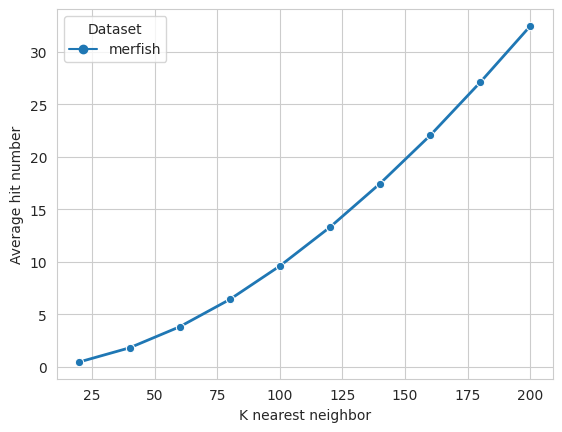

In [68]:
sns.set_style('whitegrid')
sns.lineplot(data=neighbor_hit_res,x="K nearest neighbor",y="Average hit number",hue="Dataset",markers=True,style='Dataset',\
             dashes=False,linewidth=2)

### 4.4.2. Spearman's rank correlation coefficient


In [69]:
# there is no JSD, because this dataset does not contain cell-type information
display(JSD_spearman_res)

,Dataset,Average JSD,Average spearman's rank correlation coefficient
0,merfish,NaN,0.67201
